In [1]:
import scanpy as sc
import pandas as pd
import CococoNet_reader
import numpy as np
import itertools
import anndata as ad
from scipy import sparse

In [2]:
chimp_meta_csv = pd.read_csv('/data/passala/Collaborator_Data/Allen_Brain_Data_and_Heart_for_CRUSH_testing/chimp_metadata_new.csv', )
chimp_meta_csv.columns

Index(['confirmed_subclass', 'confirmed_subclass_color', 'deprecated_cluster',
       'deprecated_cluster_color', 'nCount_RNA', 'nFeature_RNA', 'sample_id',
       'dataset', 'donor', 'species', 'tech', 'species_tech',
       'seurat_clusters', 'neighborhood', 'metacells',
       'cross_species_cluster_jesse', 'cross_species_cluster_color',
       'cross_species_cluster', 'exclude_in_final', 'cluster',
       'cluster_color'],
      dtype='object')

In [3]:
chimp_all_data = sc.read_loom('/data/passala/Collaborator_Data/Allen_Brain_Data_and_Heart_for_CRUSH_testing/chimp/loom_version_chimp_sample_combined.loom')
chimp_all_data

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/numba-0.53.1-py3.9-linux-x86_64.egg/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10002. The TBB threading layer is disabled.
  warnings.warn(problem)
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


AnnData object with n_obs × n_vars = 113268 × 56954
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech'
    layers: 'counts'

In [4]:
chimp_all_data.obs['Exclude in Final'] = chimp_meta_csv['exclude_in_final'].to_list()
chimp_all_data

AnnData object with n_obs × n_vars = 113268 × 56954
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'Exclude in Final'
    layers: 'counts'

In [5]:
chimp_all_data.obs

class class2 confirmed_cluster  \
CellID                                                                 
SM-GE4WN_S162_E1-50                    glia   glia           Oligo_1   
SM-GE4WN_S164_E1-50                    glia   glia           Oligo_1   
SM-GE4WP_S019_E1-50                    glia   glia           Astro_1   
SM-GE4WP_S022_E1-50                    glia   glia           Oligo_1   
SM-GE4WP_S086_E1-50                    glia   glia           Oligo_1   
...                                     ...    ...               ...   
TTTGTTGGTATAGGAT-14L8TX_191217_01_C07   exc    exc         L2/3 IT_3   
TTTGTTGGTCTTTATC-14L8TX_191217_01_C07   exc    exc           L5 IT_3   
TTTGTTGGTTGGGTAG-14L8TX_191217_01_C07   exc    exc           L4 IT_1   
TTTGTTGGTTTGTGGT-14L8TX_191217_01_C07   exc    exc           L4 IT_1   
TTTGTTGTCTCCTGAC-14L8TX_191217_01_C07   exc    exc           L4 IT_1   

                                      confirmed_cluster_color  \
CellID                                                          
SM-GE4WN_S162_E1-50                                   #88A19A   
SM-GE4WN_S164_E1-50                                   #88A19A   
SM-GE4WP_S019_E1-50                                   #958F80   
SM-GE4WP_S022_E1-50                                   #88A19A   
SM-GE4WP_S086_E1-50                                   #88A19A   
...                                                       ...   
TTTGTTGGTATAGGAT-14L8TX_191217_01_C07                 #BBEE4B   
TTTGTTGGTCTTTATC-14L8TX_191217_01_C07                 #48A09C   
TTTGTTGGTTGGGTAG-14L8TX_191217_01_C07                 #4FEDED   
TTTGTTGGTTTGTGGT-14L8TX_191217_01_C07                 #4FEDED   
TTTGTTGTCTCCTGAC-14L8TX_191217_01_C07                 #4FEDED   

                                      confirmed_subclass  \
CellID                                                     
SM-GE4WN_S162_E1-50                                Oligo   
SM-GE4WN_S164_E1-50                                Oligo   
SM-GE4WP_S019_E1-50                                Astro   
SM-GE4WP_S022_E1-50                                Oligo   
SM-GE4WP_S086_E1-50                                Oligo   
...                                                  ...   
TTTGTTGGTATAGGAT-14L8TX_191217_01_C07            L2/3 IT   
TTTGTTGGTCTTTATC-14L8TX_191217_01_C07              L5 IT   
TTTGTTGGTTGGGTAG-14L8TX_191217_01_C07              L4 IT   
TTTGTTGGTTTGTGGT-14L8TX_191217_01_C07              L4 IT   
TTTGTTGTCTCCTGAC-14L8TX_191217_01_C07              L4 IT   

                                      confirmed_subclass_color dataset  \
CellID                                                                   
SM-GE4WN_S162_E1-50                                    #53776C    AIBS   
SM-GE4WN_S164_E1-50                                    #53776C    AIBS   
SM-GE4WP_S019_E1-50                                    #665C47    AIBS   
SM-GE4WP_S022_E1-50                                    #53776C    AIBS   
SM-GE4WP_S086_E1-50                                    #53776C    AIBS   
...                                                        ...     ...   
TTTGTTGGTATAGGAT-14L8TX_191217_01_C07                  #B1EC30    AIBS   
TTTGTTGGTCTTTATC-14L8TX_191217_01_C07                  #50B2AD    AIBS   
TTTGTTGGTTGGGTAG-14L8TX_191217_01_C07                  #00E5E5    AIBS   
TTTGTTGGTTTGTGGT-14L8TX_191217_01_C07                  #00E5E5    AIBS   
TTTGTTGTCTCCTGAC-14L8TX_191217_01_C07                  #00E5E5    AIBS   

                                            donor  doublet_score exclude  ...  \
CellID                                                                    ...   
SM-GE4WN_S162_E1-50                    C19.32.005            NaN      no  ...   
SM-GE4WN_S164_E1-50                    C19.32.005            NaN      no  ...   
SM-GE4WP_S019_E1-50                    C19.32.004            NaN      no  ...   
SM-GE4WP_S022_E1-50                    C19.32.004            NaN      no  ...   
SM-GE4WP_S086_E1-50      

In [6]:
chimp_all_data = chimp_all_data[chimp_all_data.obs['Exclude in Final'] == 'no',:]
chimp_all_data

View of AnnData object with n_obs × n_vars = 112929 × 56954
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'Exclude in Final'
    layers: 'counts'

In [7]:
chimp_all_data = chimp_all_data[chimp_all_data.obs['exclude'] == 'no',:]
chimp_all_data

View of AnnData object with n_obs × n_vars = 112929 × 56954
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'Exclude in Final'
    layers: 'counts'

In [8]:
chimp_all_data.obs['subclass'].value_counts()

L2/3 IT       37433
L5 IT         24185
Sst            8132
Vip            7701
Oligo          6825
Pvalb          6343
Lamp5          5368
L6 IT          4269
Astro          2839
L6 IT Car3     2085
Sncg           1754
OPC            1561
L5/6 NP        1435
L6 CT          1202
L6b             933
Endo            281
Micro-PVM       253
L5 ET           197
Sst Chodl        67
VLMC             66
Name: subclass, dtype: int64

In [9]:
chimp_all_data = chimp_all_data[chimp_all_data.obs['class'] == chimp_all_data.obs['class2'], :]
chimp_all_data

View of AnnData object with n_obs × n_vars = 112658 × 56954
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'Exclude in Final'
    layers: 'counts'

In [12]:
human_all_data = sc.read_loom('/data/passala/Collaborator_Data/Allen_Brain_Data_and_Heart_for_CRUSH_testing/human/loom_version_all_human_sample_combined.loom')
human_all_data

AnnData object with n_obs × n_vars = 157508 × 50281
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'predicted.id', 'prediction.score.Astro', 'prediction.score.Endo', 'prediction.score.L2.3.IT', 'prediction.score.L5.6.NP', 'prediction.score.L5.ET', 'prediction.score.L5.IT', 'prediction.score.L6.CT', 'prediction.score.L6.IT', 'prediction.score.L6.IT.Car3', 'prediction.score.L6b', 'prediction.score.Lamp5', 'prediction.score.Micro.PVM', 'prediction.score.OPC', 'prediction.score.Oligo', 'prediction.score.Pvalb', 'prediction.score.Sncg', 'prediction.score.Sst', 'prediction.score.Sst.Chodl', 'prediction.score.VLMC', 'prediction.s

In [11]:
meta_data_human = pd.read_csv('/data/passala/Collaborator_Data/Allen_Brain_Data_and_Heart_for_CRUSH_testing/human_metadata_new.csv')
meta_data_human

confirmed_subclass confirmed_subclass_color deprecated_cluster  \
0                   Oligo                  #53776C            Oligo_3   
1                     OPC                  #374A45              OPC_2   
2                   Astro                  #665C47            Astro_5   
3                   Astro                  #665C47            Astro_5   
4                   Astro                  #665C47            Astro_2   
...                   ...                      ...                ...   
157503            L2/3 IT                  #B1EC30         L2/3 IT_10   
157504            L2/3 IT                  #B1EC30         L2/3 IT_12   
157505            L2/3 IT                  #B1EC30          L2/3 IT_5   
157506            L2/3 IT                  #B1EC30         L2/3 IT_12   
157507            L2/3 IT                  #B1EC30          L2/3 IT_1   

       deprecated_cluster_color  nCount_RNA  nFeature_RNA  \
0                       #708E85     1423089          4466   
1                       #263430     1692934          4919   
2                       #484132     1978968          5531   
3                       #484132     1761955          5658   
4                       #7D7563     1610796          6289   
...                         ...         ...           ...   
157503                  #9DD12A       36562          7931   
157504                  #8CBB25       32754          7578   
157505                  #BAED48       20870          6483   
157506                  #8CBB25       36135          8124   
157507                  #C9F170       24298          6589   

                                    sample_id dataset       donor species  \
0                         F1S4_160106_003_A01    AIBS   H200.1030   human   
1                         F1S4_160106_037_A01    AIBS   H200.1030   human   
2                         F1S4_160106_038_A01    AIBS   H200.1030   human   
3                         F1S4_160106_039_A01    AIBS   H200.1030   human   
4                         F1S4_160106_040_A01    AIBS   H200.1030   human   
...                                       ...     ...         ...     ...   
157503  TTTGTTGAGTATAGAC-16LKTX_191204_02_H01    Sten  H19.30.002   human   
157504  TTTGTTGCATAATCGC-16LKTX_191204_02_H01    Sten  H19.30.002   human   
157505  TTTGTTGGTACGATGG-16LKTX_191204_02_H01    Sten  H19.30.002   human   
157506  TTTGTTGGTGGACCTC-16LKTX_191204_02_H01    Sten  H19.30.002   human   
157507  TTTGTTGTCTCATAGG-16LKTX_191204_02_H01    Sten  H19.30.002   human   

        ... species_tech seurat_clusters  neighborhood    metacells  \
0       ...     human_ss              59          glia      59_glia   
1       ...     human_ss              52          glia      52_glia   
2       ...     human_ss              79          glia      79_glia   
3       ...     human_ss              79          glia      79_glia   
4       ...     human_ss              83          glia      83_glia   
...     ...          ...             ...           ...          ...   
157503  ...    human_10x              56      it_types  56_it_types   
157504  ...    human_10x              18      it_types  18_it_types   
157505  ...    human_10x              26      it_types  26_it_types   
157506  ...    human_10x              18      it_types  18_it_types   
157507  ...    human_10x              45      it_types  45_it_types   

       cross_species_cluster_jesse cross_species_cluster_color  \
0                          glia_10                     #53776C   
1                          glia_19                     #374A45   
2                           glia_1                     #665C47   
3                           glia_1                     #665C47   
4                           glia_1                     #665C47   
...                            ...                         ...   
157503                  it_types_7                     #B1EC30   
157504                  it_types_1                     #B1EC30   
157505                  i

In [13]:
human_all_data.obs['Exclude in Final'] = meta_data_human['exclude_in_final'].to_list()
human_all_data

AnnData object with n_obs × n_vars = 157508 × 50281
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'predicted.id', 'prediction.score.Astro', 'prediction.score.Endo', 'prediction.score.L2.3.IT', 'prediction.score.L5.6.NP', 'prediction.score.L5.ET', 'prediction.score.L5.IT', 'prediction.score.L6.CT', 'prediction.score.L6.IT', 'prediction.score.L6.IT.Car3', 'prediction.score.L6b', 'prediction.score.Lamp5', 'prediction.score.Micro.PVM', 'prediction.score.OPC', 'prediction.score.Oligo', 'prediction.score.Pvalb', 'prediction.score.Sncg', 'prediction.score.Sst', 'prediction.score.Sst.Chodl', 'prediction.score.VLMC', 'prediction.s

In [14]:
human_all_data = human_all_data[human_all_data.obs['Exclude in Final'] == 'no',:]
human_all_data

View of AnnData object with n_obs × n_vars = 156285 × 50281
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'predicted.id', 'prediction.score.Astro', 'prediction.score.Endo', 'prediction.score.L2.3.IT', 'prediction.score.L5.6.NP', 'prediction.score.L5.ET', 'prediction.score.L5.IT', 'prediction.score.L6.CT', 'prediction.score.L6.IT', 'prediction.score.L6.IT.Car3', 'prediction.score.L6b', 'prediction.score.Lamp5', 'prediction.score.Micro.PVM', 'prediction.score.OPC', 'prediction.score.Oligo', 'prediction.score.Pvalb', 'prediction.score.Sncg', 'prediction.score.Sst', 'prediction.score.Sst.Chodl', 'prediction.score.VLMC', 'pred

In [15]:
human_all_data = human_all_data[human_all_data.obs['class'] == human_all_data.obs['class2'], :]
human_all_data

View of AnnData object with n_obs × n_vars = 140798 × 50281
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'predicted.id', 'prediction.score.Astro', 'prediction.score.Endo', 'prediction.score.L2.3.IT', 'prediction.score.L5.6.NP', 'prediction.score.L5.ET', 'prediction.score.L5.IT', 'prediction.score.L6.CT', 'prediction.score.L6.IT', 'prediction.score.L6.IT.Car3', 'prediction.score.L6b', 'prediction.score.Lamp5', 'prediction.score.Micro.PVM', 'prediction.score.OPC', 'prediction.score.Oligo', 'prediction.score.Pvalb', 'prediction.score.Sncg', 'prediction.score.Sst', 'prediction.score.Sst.Chodl', 'prediction.score.VLMC', 'pred

In [16]:
#human_to_save = human_all_data.copy()
#human_to_save.obs = human_to_save.obs[['final_subclass','final_cluster','final_subclass_color','final_cluster_color','species','tech']]
#human_to_save.write('/data/passala/Generated_Tables/chimp_human_data/human_data_cleaned_up.h5ad')
#chimp_to_save = chimp_all_data.copy()
#chimp_to_save.obs = chimp_to_save.obs[['final_subclass','final_cluster','final_subclass_color','final_cluster_color','species','tech']]

#chimp_to_save.write('/data/passala/Generated_Tables/chimp_human_data/chimp_data_cleaned_up.h5ad')

In [11]:
ortholog_map = pd.read_csv('/data/passala/Collaborator_Data/Allen_Brain_Data_and_Heart_for_CRUSH_testing/human_chimp_1_1_orthologs.csv', index_col= 0)
ortholog_map

chimp          human
1      9598_0:000db2  9606_0:000a1d
2      9598_0:003687  9606_0:003744
3      9598_0:000e8a  9606_0:000fa9
4      9598_0:0013cf  9606_0:001514
5      9598_0:002ca4  9606_0:002fa3
...              ...            ...
18576  9598_0:001672  9606_0:00189c
18577  9598_0:00249d  9606_0:002335
18578  9598_0:001020  9606_0:0011e6
18579  9598_0:003a3c  9606_0:003afa
18580  9598_0:000beb  9606_0:000c37

[18580 rows x 2 columns]

In [12]:
chimp_mapper = pd.read_csv('/data/CoCoCoNet/geneInfo/chimp_info.csv')
chimp_mapper = chimp_mapper[['GeneSymbol','OrthoID']]
chimp_mapper

GeneSymbol        OrthoID
0             INTS11  9598_0:0007cc
1               CPTP  9598_0:0001ec
2             TAS1R3  9598_0:0001f3
3               DVL1  9598_0:000062
4              MXRA8  9598_0:00065c
...              ...            ...
34701    TRNAH-GUG_8            NaN
34702    TRNAH-GUG_9            NaN
34703   TRNAQ-CUG_11            NaN
34704      LOC745694            NaN
34705  transcript_id            NaN

[34706 rows x 2 columns]

In [13]:
human_mapper = pd.read_csv('/data/CoCoCoNet/geneInfo/human_info.csv')
human_mapper = human_mapper[['EnsemblID','OrthoID']]
human_mapper

EnsemblID OrthoID
0      ENSG00000223972     NaN
1      ENSG00000278267     NaN
2      ENSG00000284332     NaN
3      ENSG00000237613     NaN
4      ENSG00000268020     NaN
...                ...     ...
64480  ENSG00000275757     NaN
64481  ENSG00000278573     NaN
64482  ENSG00000276017     NaN
64483  ENSG00000278625     NaN
64484  ENSG00000277374     NaN

[64485 rows x 2 columns]

In [14]:
ortholog_map = ortholog_map.merge(right = chimp_mapper, left_on='chimp',right_on= 'OrthoID')
ortholog_map = ortholog_map.rename(columns={'GeneSymbol':'Chimp Gene'})
ortholog_map = ortholog_map.drop(columns= 'OrthoID')
ortholog_map = ortholog_map.merge(right = human_mapper, left_on='human',right_on= 'OrthoID')
ortholog_map = ortholog_map.rename(columns= {'EnsemblID':'Human Gene'})
ortholog_map = ortholog_map[['Chimp Gene','Human Gene']]
ortholog_map


Chimp Gene       Human Gene
0        ABHD12B  ENSG00000131969
1           NCK1  ENSG00000158092
2      LOC744176  ENSG00000248144
3         RPUSD4  ENSG00000165526
4         BCKDHB  ENSG00000083123
...          ...              ...
16478    CRACR2B  ENSG00000177685
16479    OTULINL  ENSG00000145569
16480     FBXO25  ENSG00000147364
16481       FBN1  ENSG00000166147
16482      FSIP2  ENSG00000188738

[16483 rows x 2 columns]

In [15]:
chimp_cococonet = CococoNet_reader.read_cococonet('chimp')
human_cococonet = CococoNet_reader.read_cococonet('human')

In [16]:
ortholog_map = ortholog_map.loc[(ortholog_map['Chimp Gene'].isin(chimp_cococonet.index.to_list())) &(ortholog_map['Human Gene'].isin(human_cococonet.index.to_list()))]
ortholog_map = ortholog_map.drop_duplicates(subset= 'Chimp Gene', keep = False)
ortholog_map = ortholog_map.drop_duplicates(subset= 'Human Gene', keep = False)
ortholog_map


Chimp Gene       Human Gene
1             NCK1  ENSG00000158092
3           RPUSD4  ENSG00000165526
4           BCKDHB  ENSG00000083123
5      C17H17orf75  ENSG00000108666
6            RBMS1  ENSG00000153250
...            ...              ...
16476       ZNF395  ENSG00000186918
16477          TUB  ENSG00000166402
16479      OTULINL  ENSG00000145569
16480       FBXO25  ENSG00000147364
16481         FBN1  ENSG00000166147

[10214 rows x 2 columns]

In [17]:
human_cococonet = human_cococonet.loc[human_cococonet.index.isin(ortholog_map['Human Gene'].to_list())]
human_cococonet = human_cococonet[human_cococonet.columns.intersection(ortholog_map['Human Gene'].to_list())]
human_cococonet = human_cococonet[ortholog_map['Human Gene'].to_list()]
human_cococonet = human_cococonet.reindex(ortholog_map['Human Gene'].to_list())
human_cococonet

ENSG00000158092  ENSG00000165526  ENSG00000083123  \
ENSG00000158092         1.000000         0.988942         0.979132   
ENSG00000165526         0.988942         1.000000         0.962238   
ENSG00000083123         0.979132         0.962238         1.000000   
ENSG00000108666         0.977166         0.981885         0.991477   
ENSG00000153250         0.990297         0.932513         0.895076   
...                          ...              ...              ...   
ENSG00000186918         0.948653         0.942799         0.931657   
ENSG00000166402         0.742722         0.837068         0.893421   
ENSG00000145569         0.988898         0.885486         0.859784   
ENSG00000147364         0.978802         0.970371         0.989418   
ENSG00000166147         0.879156         0.760110         0.847554   

                 ENSG00000108666  ENSG00000153250  ENSG00000144476  \
ENSG00000158092         0.977166         0.990297         0.880715   
ENSG00000165526         0.981885         0.932513         0.826828   
ENSG00000083123         0.991477         0.895076         0.830770   
ENSG00000108666         1.000000         0.924779         0.781358   
ENSG00000153250         0.924779         1.000000         0.840871   
...                          ...              ...              ...   
ENSG00000186918         0.941346         0.885401         0.886849   
ENSG00000166402         0.945991         0.714224         0.746231   
ENSG00000145569         0.893708         0.956464         0.733361   
ENSG00000147364         0.992766         0.884430         0.810764   
ENSG00000166147         0.820097         0.855795         0.776181   

                 ENSG00000126457  ENSG00000119714  ENSG00000111962  \
ENSG00000158092         0.944268         0.860674         0.942699   
ENSG00000165526         0.992351         0.843402         0.925065   
ENSG00000083123         0.893052         0.506419         0.898004   
ENSG00000108666         0.980039         0.749693         0.906007   
ENSG00000153250         0.850263         0.735837         0.886487   
...                          ...              ...              ...   
ENSG00000186918         0.944977         0.692171         0.866876   
ENSG00000166402         0.825006         0.710776         0.876938   
ENSG00000145569         0.851876         0.720524         0.830154   
ENSG00000147364         0.950533         0.825981         0.931320   
ENSG00000166147         0.682300         0.584498         0.790889   

                 ENSG00000102572  ...  ENSG00000105767  ENSG00000174173  \
ENSG00000158092         0.983353  ...         0.590948         0.988225   
ENSG00000165526         0.945692  ...         0.745562         0.994693   
ENSG00000083123         0.916570  ...         0.644514         0.961950   
ENSG00000108666         0.917043  ...         0.786063         0.994670   
ENSG00000153250         0.965889  ...         0.651308         0.958304   
...                          ...  ...              ...              ...   
ENSG00000186918         0.948065  ...         0.722892         0.914991   
ENSG00000166402         0.778997  ...         0.805627         0.795893   
ENSG00000145569         0.926666  ...         0.563378         0.903881   
ENSG00000147364         0.951199  ...         0.796105         0.968700   
ENSG00000166147         0.863649  ...         0.538915         0.743119   

                 ENSG00000148459  ENSG00000169914  ENSG00000138279  \
ENSG00000158092         0.938572         0.961039         0.992432   
ENSG00000165526         0.955778         0.933540         0.997969   
ENSG00000083123         0.887924         0.944615         0.970227   
ENSG00000108666         0.898944         0.975818         0.968582   
ENSG00000153250         0.898273         0.916235         0.976161   
...                          ...              ...              ...   
ENSG00000186918         0.751277         0.946578         0.932513   
ENSG00000166402         0.542518 

In [18]:
chimp_cococonet = chimp_cococonet.loc[chimp_cococonet.index.isin(ortholog_map['Chimp Gene'].to_list())]
chimp_cococonet = chimp_cococonet[chimp_cococonet.columns.intersection(ortholog_map['Chimp Gene'].to_list())]
chimp_cococonet = chimp_cococonet[ortholog_map['Chimp Gene'].to_list()]
chimp_cococonet = chimp_cococonet.reindex(ortholog_map['Chimp Gene'])
chimp_cococonet


NCK1    RPUSD4    BCKDHB  C17H17orf75     RBMS1     ACKR3  \
Chimp Gene                                                                   
NCK1         1.000000  0.902045  0.882371     0.744338  0.953052  0.620430   
RPUSD4       0.902045  1.000000  0.729123     0.822139  0.823332  0.450237   
BCKDHB       0.882371  0.729123  1.000000     0.851756  0.507121  0.453575   
C17H17orf75  0.744338  0.822139  0.851756     1.000000  0.646713  0.186717   
RBMS1        0.953052  0.823332  0.507121     0.646713  1.000000  0.737676   
...               ...       ...       ...          ...       ...       ...   
ZNF395       0.772972  0.711415  0.694630     0.389647  0.732029  0.747066   
TUB          0.587764  0.686999  0.608083     0.878999  0.317676  0.252044   
OTULINL      0.731503  0.671356  0.529306     0.616542  0.523189  0.041538   
FBXO25       0.894452  0.782412  0.851163     0.571043  0.445492  0.274966   
FBN1         0.640669  0.477336  0.220839     0.112284  0.773230  0.865079   

                PRMT1     GPR68       UST     STK24  ...     CADM4   TRMT10C  \
Chimp Gene                                           ...                       
NCK1         0.689542  0.455989  0.778763  0.799697  ...  0.232289  0.861208   
RPUSD4       0.981812  0.262616  0.638148  0.979607  ...  0.646579  0.884534   
BCKDHB       0.625014  0.160167  0.389110  0.854917  ...  0.193278  0.757066   
C17H17orf75  0.765562  0.380564  0.589401  0.952720  ...  0.494143  0.949381   
RBMS1        0.312174  0.139908  0.456613  0.936709  ...  0.187929  0.809534   
...               ...       ...       ...       ...  ...       ...       ...   
ZNF395       0.438987  0.039855  0.077674  0.762126  ...  0.409250  0.077008   
TUB          0.583785  0.594483  0.736170  0.851199  ...  0.761230  0.281672   
OTULINL      0.440768  0.454163  0.687138  0.754029  ...  0.578059  0.355101   
FBXO25       0.434257  0.124893  0.468267  0.483178  ...  0.312080  0.370609   
FBN1         0.148788  0.005029  0.174818  0.275758  ...  0.217401  0.135797   

                PDSS1     OTUD3     ANXA7    ZNF395       TUB   OTULINL  \
Chimp Gene                                                                
NCK1         0.868656  0.935155  0.883985  0.772972  0.587764  0.731503   
RPUSD4       0.784880  0.878512  0.927115  0.711415  0.686999  0.671356   
BCKDHB       0.658834  0.563586  0.984220  0.694630  0.608083  0.529306   
C17H17orf75  0.775002  0.879752  0.835731  0.389647  0.878999  0.616542   
RBMS1        0.490554  0.819542  0.686881  0.732029  0.317676  0.523189   
...               ...       ...       ...       ...       ...       ...   
ZNF395       0.302275  0.604951  0.899308  1.000000  0.666839  0.387246   
TUB          0.204576  0.913793  0.657743  0.666839  1.000000  0.630592   
OTULINL      0.950537  0.913603  0.454166  0.387246  0.630592  1.000000   
FBXO25       0.608633  0.694300  0.909241  0.701729  0.600862  0.683559   
FBN1         0.199658  0.548356  0.663726  0.688712  0.033498  0.124440   

               FBXO25      FBN1  
Chimp Gene                       
NCK1         0.894452  0.640669  
RPUSD4       0.782412  0.477336  
BCKDHB       0.851163  0.220839  
C17H17orf75  0.571043  0.112284  
RBMS1        0.445492  0.773230  
...               ...       ...  
ZNF395       0.701729  0.688712  
TUB          0.600862  0.033498  
OTULINL      0.683559  0.124440  
FBXO25       1.000000  0.640708  
FBN1         0.640708  1.000000  

[10214 rows x 10214 columns]

In [19]:
chimp_cococonet_zerod = chimp_cococonet.replace(1,0)
human_cococonet_zerod = human_cococonet.replace(1,0)


In [20]:
top_10_chimp_genes = np.array(
    [chimp_cococonet_zerod[c].nlargest(10).index.values for c in chimp_cococonet_zerod]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_chimp_genes_dataframe = pd.DataFrame(
    data=top_10_chimp_genes,
    index=chimp_cococonet_zerod.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_chimp_genes_dataframe

One         Two    Three    Four       Five      Six   Seven  \
Chimp Gene                                                                      
NCK1           AP3M1     CSNK1A1    ARCN1   RIOK2    TBC1D23     MYNN  DUSP11   
RPUSD4         USP10       ARIH2    PRMT5    BOD1     IMPDH2   KANSL2   SF3A3   
BCKDHB          SCP2       PMPCB     PEX3   MCCC1       ARL1    UFSP2   COX18   
C17H17orf75    DZIP3       PTPN4     MED7    NAE1      SUDS3   SNAPC5    OLA1   
RBMS1        ATP13A3       MOB1A    SDCBP    SHC1   ABRAXAS2   ZDHHC5  PLSCR1   
...              ...         ...      ...     ...        ...      ...     ...   
ZNF395         GANAB        NEK6  ZFP36L1    RPN2     CTDSP1    MAPK7   TULP3   
TUB           MAGEE1        BBS1   PNMA8A   PNMA1       PJA1  FAM234B   MEGF8   
OTULINL       DONSON        TMPO      WRN   TRIT1      NUP85     DHX9  NUP160   
FBXO25         RIOK3     DENND4C     ST7L    PHC3      IKZF5     HELQ   SPG11   
FBN1           LTBP1  C1H1orf198     DLC1  IQGAP1  LOC459477    ATP7A   ITGB1   

                    Eight     Nine       Ten  
Chimp Gene                                    
NCK1              SPTY2D1    MORC3     COPB1  
RPUSD4             PSMD11    PPM1G     EIF3L  
BCKDHB               SDHC     MSH3    SMIM20  
C17H17orf75           MFF    COPG2  AASDHPPT  
RBMS1        C14H14orf119   RNF149    FNDC3B  
...                   ...      ...       ...  
ZNF395              MED12     H6PD     NUMA1  
TUB                TSPYL1  ZC2HC1A      MBD1  
OTULINL             ZWINT     UTP6       TBP  
FBXO25             CCDC50     HLCS      ZZZ3  
FBN1                 ELF1  CREB3L2     ITGAV  

[10214 rows x 10 columns]

In [21]:
tidy_top_10_chimp = top_10_chimp_genes_dataframe.melt(ignore_index= False)

zipped_pairs = zip(tuple(tidy_top_10_chimp.index.to_list()),tuple(tidy_top_10_chimp['value'].to_list()))
binary_masked_chimpnet = pd.DataFrame(data = 0, columns = chimp_cococonet.columns, index = chimp_cococonet.index)

for row,column in zipped_pairs:
    binary_masked_chimpnet.at[row,column] = 1
binary_masked_chimpnet

NCK1  RPUSD4  BCKDHB  C17H17orf75  RBMS1  ACKR3  PRMT1  GPR68  \
Chimp Gene                                                                   
NCK1            0       0       0            0      0      0      0      0   
RPUSD4          0       0       0            0      0      0      0      0   
BCKDHB          0       0       0            0      0      0      0      0   
C17H17orf75     0       0       0            0      0      0      0      0   
RBMS1           0       0       0            0      0      0      0      0   
...           ...     ...     ...          ...    ...    ...    ...    ...   
ZNF395          0       0       0            0      0      0      0      0   
TUB             0       0       0            0      0      0      0      0   
OTULINL         0       0       0            0      0      0      0      0   
FBXO25          0       0       0            0      0      0      0      0   
FBN1            0       0       0            0      0      0      0      0   

             UST  STK24  ...  CADM4  TRMT10C  PDSS1  OTUD3  ANXA7  ZNF395  \
Chimp Gene               ...                                                
NCK1           0      0  ...      0        0      0      0      0       0   
RPUSD4         0      0  ...      0        0      0      0      0       0   
BCKDHB         0      0  ...      0        0      0      0      0       0   
C17H17orf75    0      0  ...      0        0      0      0      0       0   
RBMS1          0      0  ...      0        0      0      0      0       0   
...          ...    ...  ...    ...      ...    ...    ...    ...     ...   
ZNF395         0      0  ...      0        0      0      0      0       0   
TUB            0      0  ...      0        0      0      0      0       0   
OTULINL        0      0  ...      0        0      0      0      0       0   
FBXO25         0      0  ...      0        0      0      0      0       0   
FBN1           0      0  ...      0        0      0      0      0       0   

             TUB  OTULINL  FBXO25  FBN1  
Chimp Gene                               
NCK1           0        0       0     0  
RPUSD4         0        0       0     0  
BCKDHB         0        0       0     0  
C17H17orf75    0        0       0     0  
RBMS1          0        0       0     0  
...          ...      ...     ...   ...  
ZNF395         0        0       0     0  
TUB            0        0       0     0  
OTULINL        0        0       0     0  
FBXO25         0        0       0     0  
FBN1           0        0       0     0  

[10214 rows x 10214 columns]

In [22]:
ranked_columns_human_cococonet = human_cococonet_zerod.rank()
ranked_columns_human_cococonet

ENSG00000158092  ENSG00000165526  ENSG00000083123  \
ENSG00000158092              1.0           9039.0           9169.0   
ENSG00000165526           8847.0              1.0           7942.0   
ENSG00000083123           7674.0           6691.0              1.0   
ENSG00000108666           7475.0           8300.0           9963.0   
ENSG00000153250           9029.0           4986.0           4749.0   
...                          ...              ...              ...   
ENSG00000186918           5511.0           5496.0           6193.0   
ENSG00000166402           1194.0           2439.0           4690.0   
ENSG00000145569           8842.0           3425.0           3717.0   
ENSG00000147364           7629.0           7285.0           9862.0   
ENSG00000166147           3047.0           1480.0           3423.0   

                 ENSG00000108666  ENSG00000153250  ENSG00000144476  \
ENSG00000158092           7494.0          10177.0          10072.0   
ENSG00000165526           7962.0           7172.0           8763.0   
ENSG00000083123           9083.0           5202.0           8920.0   
ENSG00000108666              1.0           6731.0           6408.0   
ENSG00000153250           4624.0              1.0           9316.0   
...                          ...              ...              ...   
ENSG00000186918           5297.0           4813.0          10119.0   
ENSG00000166402           5495.0           1415.0           4664.0   
ENSG00000145569           3675.0           8753.0           4139.0   
ENSG00000147364           9235.0           4760.0           8007.0   
ENSG00000166147           2277.0           3759.0           6139.0   

                 ENSG00000126457  ENSG00000119714  ENSG00000111962  \
ENSG00000158092           5904.0           8463.0          10060.0   
ENSG00000165526           9067.0           7767.0           9490.0   
ENSG00000083123           3944.0            914.0           7843.0   
ENSG00000108666           8032.0           4232.0           8328.0   
ENSG00000153250           2858.0           3813.0           7138.0   
...                          ...              ...              ...   
ENSG00000186918           5941.0           2823.0           6037.0   
ENSG00000166402           2406.0           3213.0           6610.0   
ENSG00000145569           2891.0           3439.0           4457.0   
ENSG00000147364           6238.0           7027.0           9743.0   
ENSG00000166147           1031.0           1427.0           3288.0   

                 ENSG00000102572  ...  ENSG00000105767  ENSG00000174173  \
ENSG00000158092           9874.0  ...           1520.0           8458.0   
ENSG00000165526           7164.0  ...           4825.0           9199.0   
ENSG00000083123           5100.0  ...           2358.0           6576.0   
ENSG00000108666           5133.0  ...           6088.0           9198.0   
ENSG00000153250           8784.0  ...           2503.0           6397.0   
...                          ...  ...              ...              ...   
ENSG00000186918           7351.0  ...           4198.0           4828.0   
ENSG00000166402           1589.0  ...           6689.0           2550.0   
ENSG00000145569           5762.0  ...           1209.0           4540.0   
ENSG00000147364           7587.0  ...           6416.0           6984.0   
ENSG00000166147           2931.0  ...            992.0           1925.0   

                 ENSG00000148459  ENSG00000169914  ENSG00000138279  \
ENSG00000158092           8850.0           8123.0           9484.0   
ENSG00000165526           9669.0           6369.0          10053.0   
ENSG00000083123           6109.0           7003.0           7217.0   
ENSG00000108666           6614.0           9209.0           7049.0   
ENSG00000153250           6581.0           5506.0           7786.0   
...                          ...              ...              ...   
ENSG00000186918           2588.0           7115.0           4600.0   
ENSG00000166402            893.0 

In [23]:
chimp_to_human_dot_product = np.dot(binary_masked_chimpnet.values,ranked_columns_human_cococonet.values)
chimp_to_human_dot_dataframe = pd.DataFrame(index = binary_masked_chimpnet.index, columns = ranked_columns_human_cococonet.columns, data = chimp_to_human_dot_product)
chimp_to_human_subtract_minimum = chimp_to_human_dot_dataframe - 65
c_to_h_fc_scores = chimp_to_human_subtract_minimum/(chimp_to_human_subtract_minimum.max().max() - chimp_to_human_subtract_minimum.min().min())
c_to_h_fc_scores

ENSG00000158092  ENSG00000165526  ENSG00000083123  \
Chimp Gene                                                       
NCK1                0.960908         0.857212         0.815721   
RPUSD4              0.797748         0.928065         0.695300   
BCKDHB              0.862882         0.821736         0.972631   
C17H17orf75         0.795507         0.746057         0.904411   
RBMS1               0.707289         0.580037         0.460539   
...                      ...              ...              ...   
ZNF395              0.562476         0.513095         0.512308   
TUB                 0.421358         0.449179         0.509734   
OTULINL             0.836555         0.833273         0.761210   
FBXO25              0.850431         0.644660         0.853910   
FBN1                0.672884         0.367938         0.548993   

             ENSG00000108666  ENSG00000153250  ENSG00000144476  \
Chimp Gene                                                       
NCK1                0.769829         0.945489         0.865879   
RPUSD4              0.752356         0.749408         0.712094   
BCKDHB              0.948476         0.689118         0.817058   
C17H17orf75         0.925304         0.704174         0.550831   
RBMS1               0.430684         0.961625         0.705461   
...                      ...              ...              ...   
ZNF395              0.370807         0.617144         0.942521   
TUB                 0.594709         0.389292         0.481088   
OTULINL             0.788019         0.742126         0.669238   
FBXO25              0.769200         0.742106         0.790417   
FBN1                0.318969         0.809383         0.846638   

             ENSG00000126457  ENSG00000119714  ENSG00000111962  \
Chimp Gene                                                       
NCK1                0.640621         0.712320         0.938325   
RPUSD4              0.910504         0.729331         0.770340   
BCKDHB              0.687123         0.376566         0.875520   
C17H17orf75         0.691231         0.566348         0.815692   
RBMS1               0.484026         0.602414         0.574249   
...                      ...              ...              ...   
ZNF395              0.579487         0.608624         0.578082   
TUB                 0.523521         0.637929         0.647304   
OTULINL             0.729714         0.621655         0.682534   
FBXO25              0.459999         0.458407         0.873466   
FBN1                0.277921         0.263073         0.625321   

             ENSG00000102572  ...  ENSG00000105767  ENSG00000174173  \
Chimp Gene                    ...                                     
NCK1                0.838678  ...         0.421594         0.913531   
RPUSD4              0.868071  ...         0.689954         0.831317   
BCKDHB              0.692725  ...         0.402539         0.849261   
C17H17orf75         0.555735  ...         0.511326         0.843699   
RBMS1               0.813943  ...         0.452206         0.600635   
...                      ...  ...              ...              ...   
ZNF395              0.811624  ...         0.742853         0.330624   
TUB                 0.415747  ...         0.664462         0.499346   
OTULINL             0.738175  ...         0.358072         0.810710   
FBXO25              0.705176  ...         0.309073         0.683055   
FBN1                0.704183  ...         0.265028         0.414784   

             ENSG00000148459  ENSG00000169914  ENSG00000138279  \
Chimp Gene                                                       
NCK1                0.920823         0.779037         0.856907   
RPUSD4              0.821559         0.730717         0.899478   
BCKDHB              0.770104         0.718158         0.803929   
C17H17orf75         0.717538         0.775401         0.684490   
RBMS1               0.795507         0.450859         0.795183   
...                      ...              ...     

In [24]:
top_10_human_genes = np.array(
    [human_cococonet_zerod[c].nlargest(10).index.values for c in human_cococonet_zerod]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_human_genes_dataframe = pd.DataFrame(
    data=top_10_human_genes,
    index=human_cococonet_zerod.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_human_genes_dataframe

One              Two            Three  \
ENSG00000158092  ENSG00000144048  ENSG00000163608  ENSG00000123268   
ENSG00000165526  ENSG00000113048  ENSG00000185721  ENSG00000100353   
ENSG00000083123  ENSG00000106049  ENSG00000178425  ENSG00000078070   
ENSG00000108666  ENSG00000183513  ENSG00000166260  ENSG00000167005   
ENSG00000153250  ENSG00000136758  ENSG00000091527  ENSG00000148110   
...                          ...              ...              ...   
ENSG00000186918  ENSG00000105323  ENSG00000137497  ENSG00000147140   
ENSG00000166402  ENSG00000198932  ENSG00000173064  ENSG00000187189   
ENSG00000145569  ENSG00000158092  ENSG00000118855  ENSG00000027697   
ENSG00000147364  ENSG00000165516  ENSG00000077097  ENSG00000184939   
ENSG00000166147  ENSG00000131374  ENSG00000138246  ENSG00000154059   

                            Four             Five              Six  \
ENSG00000158092  ENSG00000067167  ENSG00000155508  ENSG00000129083   
ENSG00000165526  ENSG00000136270  ENSG00000115484  ENSG00000178035   
ENSG00000083123  ENSG00000137992  ENSG00000176623  ENSG00000117054   
ENSG00000108666  ENSG00000145439  ENSG00000143742  ENSG00000162521   
ENSG00000153250  ENSG00000114978  ENSG00000119314  ENSG00000138071   
...                          ...              ...              ...   
ENSG00000186918  ENSG00000100811  ENSG00000141580  ENSG00000101193   
ENSG00000166402  ENSG00000198934  ENSG00000196440  ENSG00000175414   
ENSG00000145569  ENSG00000137845  ENSG00000182220  ENSG00000049860   
ENSG00000147364  ENSG00000106723  ENSG00000163875  ENSG00000164209   
ENSG00000166147  ENSG00000204262  ENSG00000140262  ENSG00000018510   

                           Seven            Eight             Nine  \
ENSG00000158092  ENSG00000159579  ENSG00000157538  ENSG00000168538   
ENSG00000165526  ENSG00000071994  ENSG00000120438  ENSG00000146223   
ENSG00000083123  ENSG00000156162  ENSG00000132300  ENSG00000120333   
ENSG00000108666  ENSG00000120333  ENSG00000132313  ENSG00000119041   
ENSG00000153250  ENSG00000067167  ENSG00000084073  ENSG00000090054   
...                          ...              ...              ...   
ENSG00000186918  ENSG00000146833  ENSG00000197111  ENSG00000103275   
ENSG00000166402  ENSG00000116128  ENSG00000172006  ENSG00000135108   
ENSG00000145569  ENSG00000119314  ENSG00000124783  ENSG00000138071   
ENSG00000147364  ENSG00000113851  ENSG00000253719  ENSG00000168958   
ENSG00000166147  ENSG00000119685  ENSG00000128829  ENSG00000151779   

                             Ten  
ENSG00000158092  ENSG00000135341  
ENSG00000165526  ENSG00000147274  
ENSG00000083123  ENSG00000172340  
ENSG00000108666  ENSG00000104442  
ENSG00000153250  ENSG00000109332  
...                          ...  
ENSG00000186918  ENSG00000166295  
ENSG00000166402  ENSG00000112659  
ENSG00000145569  ENSG00000001036  
ENSG00000147364  ENSG00000115365  
ENSG00000166147  ENSG00000112210  

[10214 rows x 10 columns]

In [25]:
tidy_top_10_human= top_10_human_genes_dataframe.melt(ignore_index= False)

zipped_pairs = zip(tuple(tidy_top_10_human.index.to_list()),tuple(tidy_top_10_human['value'].to_list()))
binary_masked_humannet = pd.DataFrame(data = 0, columns = human_cococonet.columns, index = human_cococonet.index)

for row,column in zipped_pairs:
    binary_masked_humannet.at[row,column] = 1
binary_masked_humannet

ENSG00000158092  ENSG00000165526  ENSG00000083123  \
ENSG00000158092                0                0                0   
ENSG00000165526                0                0                0   
ENSG00000083123                0                0                0   
ENSG00000108666                0                0                0   
ENSG00000153250                0                0                0   
...                          ...              ...              ...   
ENSG00000186918                0                0                0   
ENSG00000166402                0                0                0   
ENSG00000145569                1                0                0   
ENSG00000147364                0                0                0   
ENSG00000166147                0                0                0   

                 ENSG00000108666  ENSG00000153250  ENSG00000144476  \
ENSG00000158092                0                0                0   
ENSG00000165526                0                0                0   
ENSG00000083123                0                0                0   
ENSG00000108666                0                0                0   
ENSG00000153250                0                0                0   
...                          ...              ...              ...   
ENSG00000186918                0                0                0   
ENSG00000166402                0                0                0   
ENSG00000145569                0                0                0   
ENSG00000147364                0                0                0   
ENSG00000166147                0                0                0   

                 ENSG00000126457  ENSG00000119714  ENSG00000111962  \
ENSG00000158092                0                0                0   
ENSG00000165526                0                0                0   
ENSG00000083123                0                0                0   
ENSG00000108666                0                0                0   
ENSG00000153250                0                0                0   
...                          ...              ...              ...   
ENSG00000186918                0                0                0   
ENSG00000166402                0                0                0   
ENSG00000145569                0                0                0   
ENSG00000147364                0                0                0   
ENSG00000166147                0                0                0   

                 ENSG00000102572  ...  ENSG00000105767  ENSG00000174173  \
ENSG00000158092                0  ...                0                0   
ENSG00000165526                0  ...                0                0   
ENSG00000083123                0  ...                0                0   
ENSG00000108666                0  ...                0                0   
ENSG00000153250                0  ...                0                0   
...                          ...  ...              ...              ...   
ENSG00000186918                0  ...                0                0   
ENSG00000166402                0  ...                0                0   
ENSG00000145569                0  ...                0                0   
ENSG00000147364                0  ...                0                0   
ENSG00000166147                0  ...                0                0   

                 ENSG00000148459  ENSG00000169914  ENSG00000138279  \
ENSG00000158092                0                0                0   
ENSG00000165526                0                0                0   
ENSG00000083123                0                0                0   
ENSG00000108666                0                0                0   
ENSG00000153250                0                0                0   
...                          ...              ...              ...   
ENSG00000186918                0                0                0   
ENSG00000166402                0 

In [26]:
ranked_columns_chimp_cococonet = chimp_cococonet_zerod.rank()
ranked_columns_chimp_cococonet

NCK1  RPUSD4  BCKDHB  C17H17orf75    RBMS1    ACKR3   PRMT1  \
Chimp Gene                                                                   
NCK1            1.0  7977.0  9134.0       6295.0  10147.0   8934.0  6074.0   
RPUSD4       7733.0     1.0  6861.0       7460.0   8814.0   6956.0  9965.0   
BCKDHB       7373.0  4835.0     1.0       7916.0   3828.0   7003.0  5364.0   
C17H17orf75  5491.0  6311.0  8683.0          1.0   5815.0   2621.0  6944.0   
RBMS1        8878.0  6330.0  4213.0       5014.0      1.0   9753.0  2231.0   
...             ...     ...     ...          ...      ...      ...     ...   
ZNF395       5818.0  4613.0  6379.0       2711.0   7267.0   9791.0  3372.0   
TUB          3857.0  4281.0  5308.0       8419.0   1799.0   3682.0  4912.0   
OTULINL      5350.0  4088.0  4441.0       4684.0   4032.0    425.0  3388.0   
FBXO25       7591.0  5623.0  8675.0       4248.0   3133.0   4071.0  3327.0   
FBN1         4395.0  2231.0  1575.0        759.0   7986.0  10147.0   917.0   

              GPR68     UST   STK24  ...   CADM4  TRMT10C    PDSS1   OTUD3  \
Chimp Gene                           ...                                     
NCK1         7567.0  9051.0  5573.0  ...  1353.0   8423.0   9202.0  8411.0   
RPUSD4       4669.0  7220.0  9725.0  ...  6885.0   8729.0   8047.0  7226.0   
BCKDHB       2901.0  3967.0  6610.0  ...  1039.0   7270.0   6445.0  3352.0   
C17H17orf75  6546.0  6528.0  8946.0  ...  4411.0   9536.0   7932.0  7243.0   
RBMS1        2546.0  4757.0  8503.0  ...  1004.0   7842.0   4535.0  6221.0   
...             ...     ...     ...  ...     ...      ...      ...     ...   
ZNF395        748.0   654.0  4893.0  ...  3189.0    640.0   2545.0  3717.0   
TUB          9169.0  8541.0  6531.0  ...  8632.0   2789.0   1588.0  7900.0   
OTULINL      7536.0  7897.0  4756.0  ...  5731.0   3436.0  10010.0  7894.0   
FBXO25       2297.0  4913.0  1864.0  ...  2047.0   3587.0   5861.0  4628.0   
FBN1           72.0  1551.0   653.0  ...  1242.0   1303.0   1548.0  3207.0   

              ANXA7  ZNF395     TUB  OTULINL  FBXO25    FBN1  
Chimp Gene                                                    
NCK1         7531.0  8229.0  5422.0   7775.0  9229.0  8025.0  
RPUSD4       8511.0  7262.0  6608.0   6903.0  7555.0  6326.0  
BCKDHB       9918.0  6996.0  5646.0   4955.0  8565.0  3278.0  
C17H17orf75  6557.0  2777.0  9085.0   6143.0  4901.0  1829.0  
RBMS1        4424.0  7606.0  2792.0   4876.0  3606.0  9220.0  
...             ...     ...     ...      ...     ...     ...  
ZNF395       7858.0     1.0  6370.0   3237.0  6465.0  8485.0  
TUB          4099.0  6548.0     1.0   6334.0  5251.0   674.0  
OTULINL      2252.0  2747.0  5922.0      1.0  6225.0  1990.0  
FBXO25       8091.0  7093.0  5571.0   7059.0     1.0  8026.0  
FBN1         4149.0  6892.0   309.0    756.0  5662.0     1.0  

[10214 rows x 10214 columns]

In [27]:
human_to_chimp_dot_product = np.dot(binary_masked_humannet.values,ranked_columns_chimp_cococonet.values)
human_to_chimp_dot_dataframe = pd.DataFrame(index = binary_masked_humannet.index, columns = ranked_columns_chimp_cococonet.columns, data = human_to_chimp_dot_product)
human_to_chimp_subtract_minimum = human_to_chimp_dot_dataframe - 65
h_to_c_fc_scores = human_to_chimp_subtract_minimum/(human_to_chimp_subtract_minimum.max().max() - human_to_chimp_subtract_minimum.min().min())
h_to_c_fc_scores

NCK1    RPUSD4    BCKDHB  C17H17orf75     RBMS1  \
ENSG00000158092  0.961026  0.765657  0.865361     0.683317  0.915940   
ENSG00000165526  0.698146  0.956693  0.775680     0.825631  0.661796   
ENSG00000083123  0.695856  0.599611  0.959651     0.678413  0.730889   
ENSG00000108666  0.790499  0.735046  0.946767     0.947514  0.617417   
ENSG00000153250  0.928922  0.720866  0.845864     0.650357  0.977683   
...                   ...       ...       ...          ...       ...   
ENSG00000186918  0.841039  0.846994  0.747035     0.730732  0.635440   
ENSG00000166402  0.488507  0.507513  0.489058     0.756754  0.244730   
ENSG00000145569  0.741306  0.560323  0.853156     0.493873  0.904629   
ENSG00000147364  0.800513  0.680929  0.851977     0.942385  0.559517   
ENSG00000166147  0.755437  0.569855  0.755319     0.732697  0.641336   

                    ACKR3     PRMT1     GPR68       UST     STK24  ...  \
ENSG00000158092  0.753815  0.534950  0.540757  0.697556  0.690382  ...   
ENSG00000165526  0.641798  0.922515  0.655890  0.682816  0.880278  ...   
ENSG00000083123  0.790883  0.465552  0.124773  0.281748  0.468667  ...   
ENSG00000108666  0.572361  0.680359  0.473394  0.671308  0.725681  ...   
ENSG00000153250  0.788632  0.528257  0.497145  0.690205  0.780417  ...   
...                   ...       ...       ...       ...       ...  ...   
ENSG00000186918  0.734142  0.809770  0.659516  0.705280  0.780869  ...   
ENSG00000166402  0.456501  0.463743  0.800199  0.781655  0.676743  ...   
ENSG00000145569  0.654141  0.360079  0.477147  0.585283  0.653875  ...   
ENSG00000147364  0.478897  0.653905  0.710311  0.843535  0.764065  ...   
ENSG00000166147  0.744725  0.484518  0.553444  0.775720  0.688859  ...   

                    CADM4   TRMT10C     PDSS1     OTUD3     ANXA7    ZNF395  \
ENSG00000158092  0.460589  0.813966  0.795580  0.774589  0.803412  0.732442   
ENSG00000165526  0.697644  0.912019  0.855347  0.630526  0.825827  0.556598   
ENSG00000083123  0.329281  0.784475  0.566455  0.346085  0.899067  0.693144   
ENSG00000108666  0.462830  0.941559  0.785370  0.673028  0.835929  0.419011   
ENSG00000153250  0.490443  0.806419  0.754749  0.756596  0.878264  0.679730   
...                   ...       ...       ...       ...       ...       ...   
ENSG00000186918  0.805073  0.614076  0.784063  0.743487  0.808876  0.924863   
ENSG00000166402  0.793280  0.371911  0.424839  0.849893  0.565167  0.595788   
ENSG00000145569  0.400949  0.629377  0.682442  0.608190  0.791079  0.726880   
ENSG00000147364  0.617840  0.823655  0.645296  0.825198  0.801181  0.474799   
ENSG00000166147  0.568646  0.669549  0.611167  0.744804  0.699630  0.564096   

                      TUB   OTULINL    FBXO25      FBN1  
ENSG00000158092  0.476509  0.801967  0.835123  0.734456  
ENSG00000165526  0.538389  0.757196  0.569020  0.401274  
ENSG00000083123  0.298592  0.329773  0.675190  0.766590  
ENSG00000108666  0.626831  0.590619  0.654337  0.565610  
ENSG00000153250  0.408231  0.714734  0.782127  0.882588  
...                   ...       ...       ...       ...  
ENSG00000186918  0.681489  0.801594  0.844921  0.674138  
ENSG00000166402  0.974008  0.582414  0.635234  0.449573  
ENSG00000145569  0.481687  0.771681  0.768123  0.770384  
ENSG00000147364  0.865646  0.584173  0.796769  0.552550  
ENSG00000166147  0.652961  0.661010  0.719274  0.804139  

[10214 rows x 10214 columns]

In [28]:
chimp_human_fc_scores_1_1 = (c_to_h_fc_scores + h_to_c_fc_scores.T) / 2
chimp_human_fc_scores_1_1

ENSG00000158092  ENSG00000165526  ENSG00000083123  \
Chimp Gene                                                       
NCK1                0.960967         0.777679         0.755789   
RPUSD4              0.781702         0.942379         0.647455   
BCKDHB              0.864121         0.798708         0.966141   
C17H17orf75         0.739412         0.785844         0.791412   
RBMS1               0.811615         0.620916         0.595714   
...                      ...              ...              ...   
ZNF395              0.647459         0.534846         0.602726   
TUB                 0.448933         0.493784         0.404163   
OTULINL             0.819261         0.795234         0.545492   
FBXO25              0.842777         0.606840         0.764550   
FBN1                0.703670         0.384606         0.657792   

             ENSG00000108666  ENSG00000153250  ENSG00000144476  \
Chimp Gene                                                       
NCK1                0.780164         0.937205         0.799377   
RPUSD4              0.743701         0.735137         0.656570   
BCKDHB              0.947622         0.767491         0.695176   
C17H17orf75         0.936409         0.677265         0.486027   
RBMS1               0.524051         0.969654         0.767487   
...                      ...              ...              ...   
ZNF395              0.394909         0.648437         0.881526   
TUB                 0.610770         0.398762         0.437643   
OTULINL             0.689319         0.728430         0.557047   
FBXO25              0.711768         0.762117         0.726524   
FBN1                0.442289         0.845985         0.823502   

             ENSG00000126457  ENSG00000119714  ENSG00000111962  \
Chimp Gene                                                       
NCK1                0.552197         0.704221         0.909105   
RPUSD4              0.906442         0.745430         0.712206   
BCKDHB              0.646866         0.426193         0.829128   
C17H17orf75         0.695018         0.524602         0.770151   
RBMS1               0.430715         0.654353         0.732236   
...                      ...              ...              ...   
ZNF395              0.523143         0.673334         0.618666   
TUB                 0.540217         0.707099         0.703282   
OTULINL             0.655661         0.655095         0.680891   
FBXO25              0.439077         0.597257         0.850526   
FBN1                0.243347         0.413329         0.684969   

             ENSG00000102572  ...  ENSG00000105767  ENSG00000174173  \
Chimp Gene                    ...                                     
NCK1                0.852815  ...         0.438045         0.882941   
RPUSD4              0.887780  ...         0.691396         0.841303   
BCKDHB              0.756146  ...         0.416765         0.866627   
C17H17orf75         0.676782  ...         0.522656         0.876297   
RBMS1               0.837647  ...         0.421536         0.698476   
...                      ...  ...              ...              ...   
ZNF395              0.808682  ...         0.721915         0.350304   
TUB                 0.555138  ...         0.743120         0.462515   
OTULINL             0.723241  ...         0.389657         0.760604   
FBXO25              0.768754  ...         0.433180         0.644930   
FBN1                0.702285  ...         0.344427         0.417974   

             ENSG00000148459  ENSG00000169914  ENSG00000138279  \
Chimp Gene                                                       
NCK1                0.901926         0.806284         0.838969   
RPUSD4              0.831741         0.798230         0.878066   
BCKDHB              0.797975         0.726715         0.833161   
C17H17orf75         0.689122         0.765247         0.714175   
RBMS1               0.839603         0.633661         0.840005   
...                      ...              ...     

In [29]:
chimp_var_genes = chimp_all_data.var.index
human_var_genes = human_all_data.var.index

In [30]:
chimp_intersect = chimp_var_genes.intersection(chimp_human_fc_scores_1_1.index.to_list())


In [31]:
chimp_trimmed_to_fc_genes = chimp_all_data[:,chimp_intersect]
chimp_trimmed_to_fc_genes

View of AnnData object with n_obs × n_vars = 112658 × 9807
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'Exclude in Final'
    layers: 'counts'

In [32]:
sc.pp.log1p(chimp_trimmed_to_fc_genes)
sc.pp.highly_variable_genes(chimp_trimmed_to_fc_genes, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.tl.pca(chimp_trimmed_to_fc_genes, svd_solver='arpack')

sc.pp.neighbors(chimp_trimmed_to_fc_genes, n_neighbors=10, n_pcs=40)
sc.tl.umap(chimp_trimmed_to_fc_genes)
sc.tl.leiden(chimp_trimmed_to_fc_genes)


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:375: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [33]:
color_list =chimp_trimmed_to_fc_genes.obs['final_cluster_color'].value_counts().index.to_list()

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'class' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'class2' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in panda

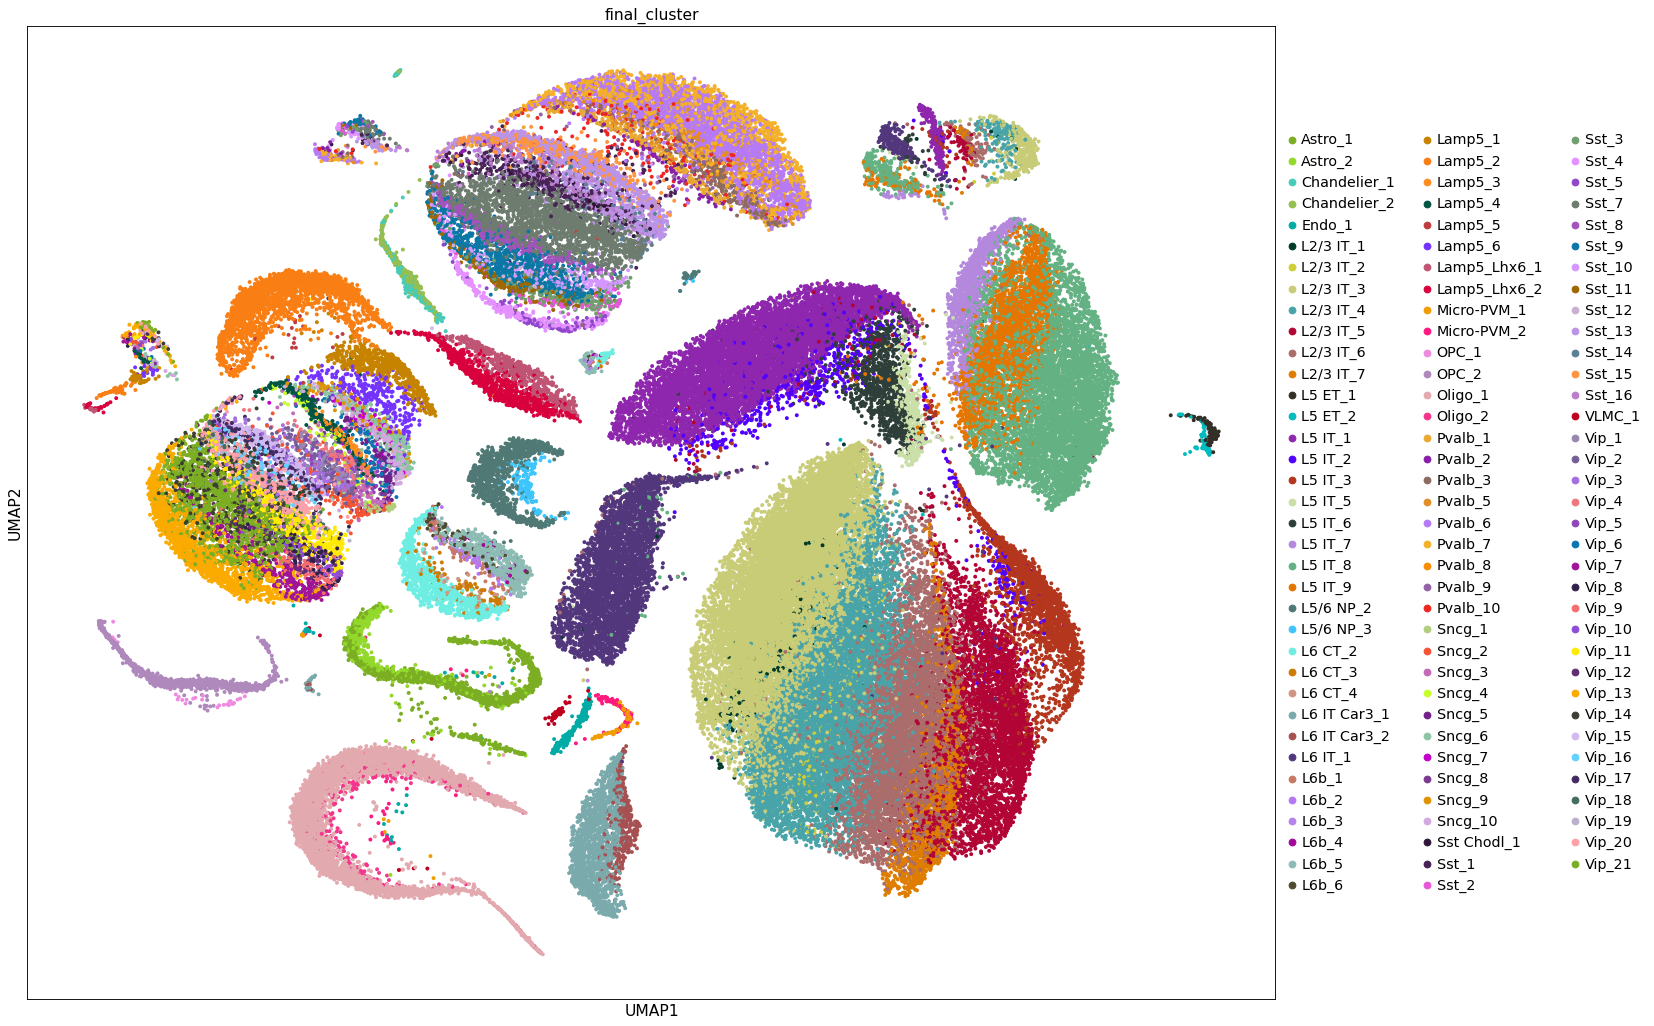

In [34]:
sc.set_figure_params(facecolor = 'white', figsize = (20,16))
sc.pl.umap(chimp_trimmed_to_fc_genes, color=['final_cluster'], palette = color_list, s =50)


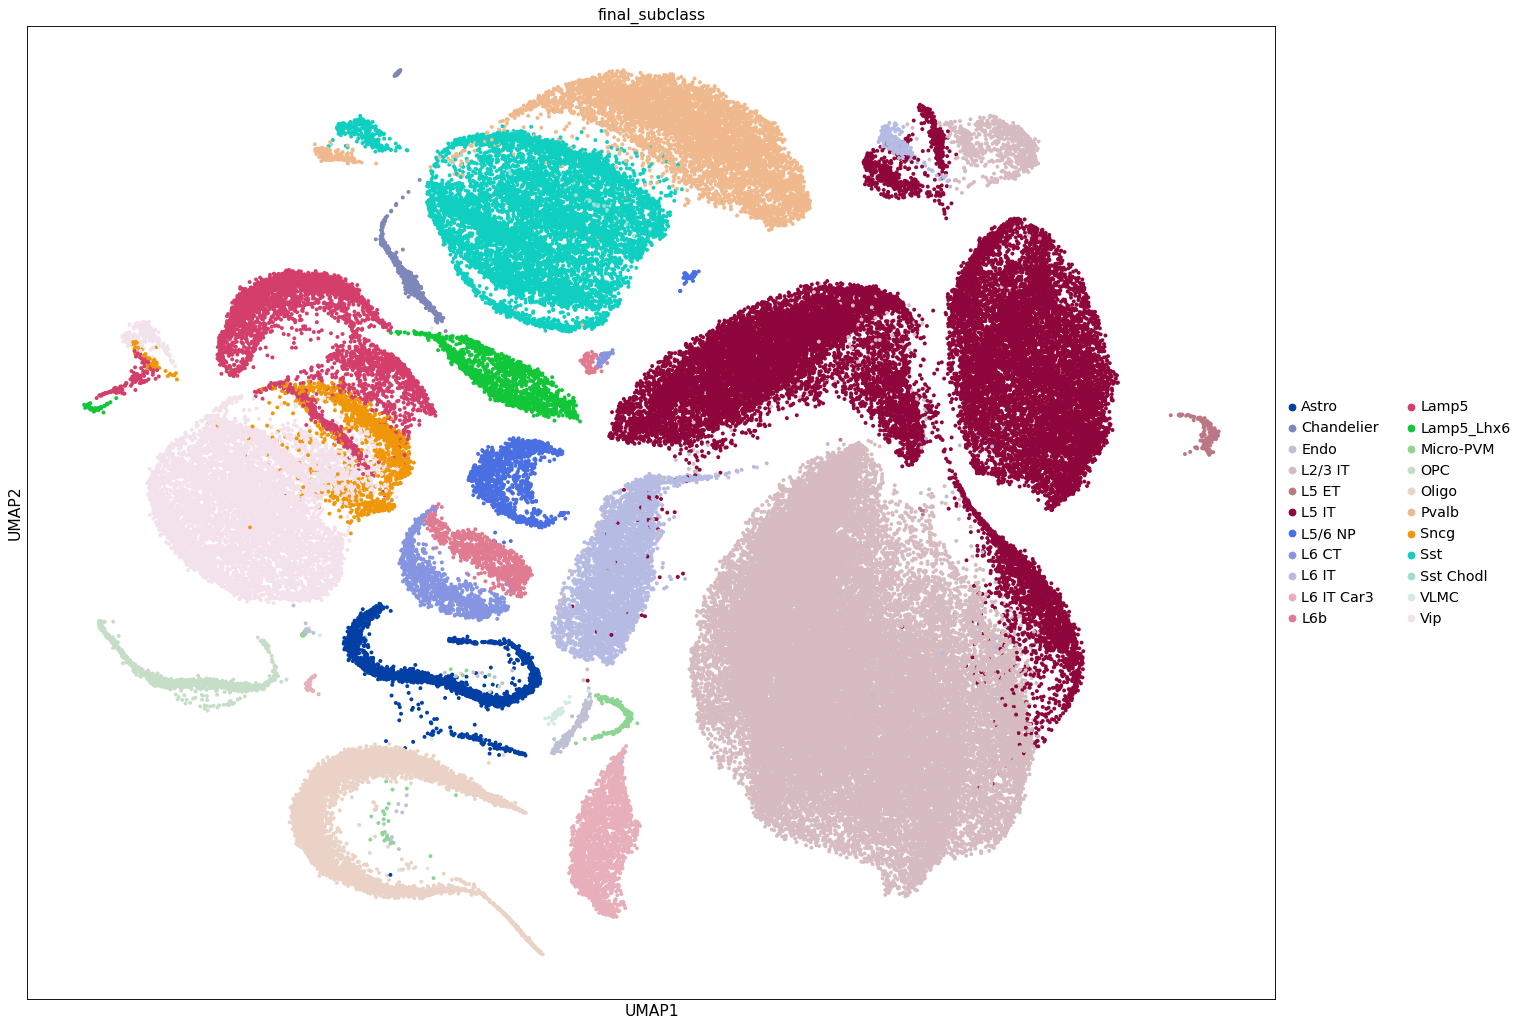

In [35]:
sc.pl.umap(chimp_trimmed_to_fc_genes, color=['final_subclass'], s =50)


In [36]:
ortholog_map

Chimp Gene       Human Gene
1             NCK1  ENSG00000158092
3           RPUSD4  ENSG00000165526
4           BCKDHB  ENSG00000083123
5      C17H17orf75  ENSG00000108666
6            RBMS1  ENSG00000153250
...            ...              ...
16476       ZNF395  ENSG00000186918
16477          TUB  ENSG00000166402
16479      OTULINL  ENSG00000145569
16480       FBXO25  ENSG00000147364
16481         FBN1  ENSG00000166147

[10214 rows x 2 columns]

In [37]:
chimp_human_map = pd.read_csv('/data/CoCoCoNet/orthologMaps/chimp_human_orthoNM.csv')
chimp_human_map

chimp            human  chimp_OrthoID  human_OrthoID
0              IPO9  ENSG00000198700  9598_0:0003d9  9606_0:00000d
1             PRDX1  ENSG00000117450  9598_0:000482  9606_0:00000e
2              BTG2  ENSG00000159388  9598_0:00062c  9606_0:00000f
3             MIXL1  ENSG00000185155  9598_0:000870  9606_0:000010
4             SF3B4  ENSG00000143368  9598_0:000683  9606_0:000011
...             ...              ...            ...            ...
18486         MUC20  ENSG00000275430  9598_0:001096  9606_0:0055a3
18487  LOC100616513  ENSG00000233312  9598_0:001a46  9606_0:0055a7
18488     LOC462577  ENSG00000233312  9598_0:001bd8  9606_0:0055a7
18489         LENG9  ENSG00000273574  9598_0:0049f6  9606_0:0055a8
18490        LILRA6  ENSG00000244482  9598_0:004ac8  9606_0:0055aa

[18491 rows x 4 columns]

In [38]:
dictionary_mapper_chimp_to_human = ortholog_map.set_index("Chimp Gene").to_dict()['Human Gene']
dictionary_mapper_human_to_chimp = ortholog_map.set_index('Human Gene').to_dict()['Chimp Gene']

In [39]:
chimp_human_map['Group ID'] = 'Unassigned'

In [40]:
id_indexer = 0
for gene_pair in chimp_human_map.iterrows():
    
    if gene_pair[1]['Group ID'] == 'Unassigned':
        current_chimp_gene = gene_pair[1]['chimp']
        current_human_gene = gene_pair[1]['human']
        chimp_human_map['Group ID'].loc[(chimp_human_map['chimp'] == current_chimp_gene) & (chimp_human_map['Group ID'] == 'Unassigned')] = id_indexer
        chimp_human_map['Group ID'].loc[(chimp_human_map['human'] == current_human_gene) & (chimp_human_map['Group ID'] == 'Unassigned')] = id_indexer

        all_labeled_groups = chimp_human_map.loc[chimp_human_map['Group ID'] == id_indexer]

        all_labeled_groups_chimp_genes = all_labeled_groups['chimp'].to_list()
        all_labeled_groups_human_genes = all_labeled_groups['human'].to_list()

        chimp_human_map['Group ID'].loc[chimp_human_map['chimp'].isin(all_labeled_groups_chimp_genes)] = id_indexer
        chimp_human_map['Group ID'].loc[chimp_human_map['human'].isin(all_labeled_groups_human_genes)] = id_indexer

        id_indexer += 1


In [41]:
chimp_human_map

chimp            human  chimp_OrthoID  human_OrthoID Group ID
0              IPO9  ENSG00000198700  9598_0:0003d9  9606_0:00000d        0
1             PRDX1  ENSG00000117450  9598_0:000482  9606_0:00000e        1
2              BTG2  ENSG00000159388  9598_0:00062c  9606_0:00000f        2
3             MIXL1  ENSG00000185155  9598_0:000870  9606_0:000010        3
4             SF3B4  ENSG00000143368  9598_0:000683  9606_0:000011        4
...             ...              ...            ...            ...      ...
18486         MUC20  ENSG00000275430  9598_0:001096  9606_0:0055a3     3422
18487  LOC100616513  ENSG00000233312  9598_0:001a46  9606_0:0055a7     5296
18488     LOC462577  ENSG00000233312  9598_0:001bd8  9606_0:0055a7     5296
18489         LENG9  ENSG00000273574  9598_0:0049f6  9606_0:0055a8    14275
18490        LILRA6  ENSG00000244482  9598_0:004ac8  9606_0:0055aa    14574

[18491 rows x 5 columns]

In [42]:
chimp_human_map.loc[chimp_human_map['Group ID'] == 0]


chimp            human  chimp_OrthoID  human_OrthoID Group ID
0  IPO9  ENSG00000198700  9598_0:0003d9  9606_0:00000d        0

In [43]:
all_pairs_to_evaluate_for_functional_conservation = pd.DataFrame(columns = ['Chimp','Human','Group Number'])
for group_number in list(set(chimp_human_map['Group ID'].to_list())):
    current_gene_map = chimp_human_map.loc[chimp_human_map['Group ID'] == group_number]
    list_of_chimp_genes_in_group = list(set(current_gene_map['chimp'].to_list()))
    list_of_human_genes_in_group = list(set(current_gene_map['human'].to_list()))
    all_combo_list_current_genes = itertools.product(list_of_chimp_genes_in_group,list_of_human_genes_in_group)
    all_combo_list_current_genes = list(map(list,all_combo_list_current_genes))
    current_list_of_pairs = pd.DataFrame(all_combo_list_current_genes,columns = ['Chimp','Human'])
    current_list_of_pairs['Group Number'] = group_number
    all_pairs_to_evaluate_for_functional_conservation = all_pairs_to_evaluate_for_functional_conservation.append(current_list_of_pairs)

In [44]:
all_pairs_to_evaluate_for_functional_conservation['Chimp Score'] = np.nan
all_pairs_to_evaluate_for_functional_conservation['Human Score'] = np.nan


In [45]:
chimp_cococonet = CococoNet_reader.read_cococonet('chimp')
human_cococonet = CococoNet_reader.read_cococonet('human')

In [46]:
ortholog_map

Chimp Gene       Human Gene
1             NCK1  ENSG00000158092
3           RPUSD4  ENSG00000165526
4           BCKDHB  ENSG00000083123
5      C17H17orf75  ENSG00000108666
6            RBMS1  ENSG00000153250
...            ...              ...
16476       ZNF395  ENSG00000186918
16477          TUB  ENSG00000166402
16479      OTULINL  ENSG00000145569
16480       FBXO25  ENSG00000147364
16481         FBN1  ENSG00000166147

[10214 rows x 2 columns]

In [47]:
trimmed_chimp_cococonet = chimp_cococonet[chimp_cococonet.columns.intersection(chimp_human_map['chimp'].to_list())]
trimmed_chimp_cococonet = trimmed_chimp_cococonet[trimmed_chimp_cococonet.index.isin(chimp_human_map['chimp'].to_list())]
double_chimp_trimmed_cococonet = trimmed_chimp_cococonet[trimmed_chimp_cococonet.columns.intersection(ortholog_map['Chimp Gene'].to_list())]
double_chimp_trimmed_cococonet = double_chimp_trimmed_cococonet.replace(1,0)

trimmed_human_cococonet = human_cococonet[human_cococonet.columns.intersection(chimp_human_map['human'].to_list())]
trimmed_human_cococonet = trimmed_human_cococonet[trimmed_human_cococonet.index.isin(chimp_human_map['human'].to_list())]
double_human_trimmed_cococonet = trimmed_human_cococonet[trimmed_human_cococonet.columns.intersection(ortholog_map['Human Gene'].to_list())]
double_human_trimmed_cococonet = double_human_trimmed_cococonet.replace(1,0)

In [48]:
human_cococonet_ranked = trimmed_human_cococonet.rank()
chimp_cococonet_ranked = trimmed_chimp_cococonet.rank()

In [49]:
top_10_chimp_genes = np.array(
    [double_chimp_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_chimp_trimmed_cococonet.T]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_chimp_genes_dataframe = pd.DataFrame(
    data=top_10_chimp_genes,
    index=double_chimp_trimmed_cococonet.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_chimp_genes_dataframe

One      Two   Three     Four      Five       Six    Seven  \
INTS11          DPH7    DHX30  QRICH1    CPSF7      EDC4    GTF3C5   GTF3C2   
CPTP           FBXW5  CCDC124    CRAT   NDUFS8      EPN1     BCKDK  NDUFA11   
DVL1           RABL6     SBF1    GRK2    STK25      MBD3     STUB1    FASTK   
MXRA8           MRC2   COL6A2     VIM   COL1A1  MARVELD1    SORBS3  TGFB1I1   
AURKAIP1  GADD45GIP1   MRPL28   SSNA1   NDUFB7   NDUFA11   TRAPPC5   MRPL38   
...              ...      ...     ...      ...       ...       ...      ...   
NFATC2IP      DAZAP1     ILF3  METTL3   ZNF207     CSTF2    GABPB1    NUP85   
ATXN2L         NISCH  ATP13A1   CNOT3     SAFB     KMT2B    PTPN23    ACIN1   
TUFM           PMPCA     CYC1    MDH2  NDUFB10    NDUFV1  SLC25A11   TIMM50   
SH2B1          USP20    CTBP1  NEURL4    RUSC1     EXOC7       JRK   FBXO44   
RABEP2       TMEM259   BORCS8   LEMD2  ARHGEF1     RBCK1     AP5Z1   ARFRP1   

            Eight     Nine      Ten  
INTS11    EXOSC10   UBAP2L    USP19  
CPTP      NDUFB10   RAD23A      BAD  
DVL1         MIB2    NELFB    VPS4A  
MXRA8         BGN    MFAP4  EMILIN1  
AURKAIP1   NDUFS8    MRPL4     GPX4  
...           ...      ...      ...  
NFATC2IP  PROSER1  METTL17   SRSF10  
ATXN2L      NELFA      SF1    TOP3B  
TUFM       MRPL37  NDUFA11    TBRG4  
SH2B1        DTX3  SMARCC2     MZF1  
RABEP2      NDOR1    ZFPL1   CORO1B  

[11164 rows x 10 columns]

In [50]:
double_human_trimmed_cococonet

ENSG00000188976  ENSG00000187961  ENSG00000187608  \
ENSG00000187634         0.656982         0.712637         0.302695   
ENSG00000188976         0.000000         0.986988         0.837351   
ENSG00000187961         0.986988         0.000000         0.794470   
ENSG00000187583         0.840109         0.860053         0.758308   
ENSG00000187642         0.699588         0.734980         0.527765   
...                          ...              ...              ...   
ENSG00000206450         0.359344         0.420117         0.731760   
ENSG00000206280         0.088668         0.092550         0.113460   
ENSG00000271254         0.871956         0.790514         0.063871   
ENSG00000275063         0.196466         0.139243         0.130681   
ENSG00000277196         0.601612         0.678707         0.293298   

                 ENSG00000188157  ENSG00000131591  ENSG00000078808  \
ENSG00000187634         0.602214         0.657692         0.643422   
ENSG00000188976         0.924461         0.980660         0.996707   
ENSG00000187961         0.894890         0.989753         0.970701   
ENSG00000187583         0.863883         0.851449         0.852153   
ENSG00000187642         0.703459         0.795125         0.701486   
...                          ...              ...              ...   
ENSG00000206450         0.501979         0.368718         0.637318   
ENSG00000206280         0.112857         0.086044         0.127361   
ENSG00000271254         0.681417         0.744735         0.838507   
ENSG00000275063         0.145903         0.149761         0.293745   
ENSG00000277196         0.606720         0.598671         0.690845   

                 ENSG00000176022  ENSG00000160087  ENSG00000169972  \
ENSG00000187634         0.602255         0.661506         0.686967   
ENSG00000188976         0.998808         0.999369         0.998654   
ENSG00000187961         0.942999         0.989908         0.981865   
ENSG00000187583         0.757120         0.817815         0.779560   
ENSG00000187642         0.610373         0.717421         0.631354   
...                          ...              ...              ...   
ENSG00000206450         0.486966         0.489389         0.509237   
ENSG00000206280         0.103478         0.123036         0.157022   
ENSG00000271254         0.813331         0.853423         0.735403   
ENSG00000275063         0.196073         0.220118         0.173306   
ENSG00000277196         0.517033         0.581631         0.644043   

                 ENSG00000127054  ...  ENSG00000275932  ENSG00000277936  \
ENSG00000187634         0.710931  ...         0.353725         0.222059   
ENSG00000188976         0.999651  ...         0.873448         0.929531   
ENSG00000187961         0.998073  ...         0.722811         0.649625   
ENSG00000187583         0.853313  ...         0.304599         0.284990   
ENSG00000187642         0.712288  ...         0.166767         0.166994   
...                          ...  ...              ...              ...   
ENSG00000206450         0.505265  ...         0.061906         0.232944   
ENSG00000206280         0.144276  ...         0.016291         0.034223   
ENSG00000271254         0.870905  ...         0.581332         0.812812   
ENSG00000275063         0.188624  ...         0.025420         0.074115   
ENSG00000277196         0.764067  ...         0.117240         0.238114   

                 ENSG00000277656  ENSG00000137403  ENSG00000137332  \
ENSG00000187634         0.264801         0.006019         0.092707   
ENSG00000188976         0.788844         0.041882         0.178558   
ENSG00000187961         0.682375         0.109480         0.135025   
ENSG00000187583         0.300638         0.006711         0.039600   
ENSG00000187642         0.182098         0.002625         0.109081   
...                          ...              ...              ...   
ENSG00000206450         0.078641         0.002788         0.000238   
ENSG00000206280         0.065447 

In [51]:
top_10_chimp_genes_as_human = top_10_chimp_genes_dataframe.replace(to_replace=dictionary_mapper_chimp_to_human)
top_10_chimp_genes_as_human

One              Two            Three             Four  \
INTS11    ENSG00000148399  ENSG00000132153  ENSG00000198218  ENSG00000149532   
CPTP      ENSG00000159069  ENSG00000007080  ENSG00000095321  ENSG00000110717   
DVL1      ENSG00000196642  ENSG00000100241  ENSG00000173020  ENSG00000115694   
MXRA8     ENSG00000011028  ENSG00000142173  ENSG00000026025  ENSG00000108821   
AURKAIP1  ENSG00000179271  ENSG00000086504  ENSG00000176101  ENSG00000099795   
...                   ...              ...              ...              ...   
NFATC2IP  ENSG00000071626  ENSG00000129351  ENSG00000165819  ENSG00000010244   
ATXN2L    ENSG00000010322  ENSG00000105726  ENSG00000088038  ENSG00000160633   
TUFM      ENSG00000165688  ENSG00000179091  ENSG00000146701  ENSG00000140990   
SH2B1     ENSG00000136878  ENSG00000159692  ENSG00000215041  ENSG00000160753   
RABEP2    ENSG00000182087  ENSG00000254901  ENSG00000161904  ENSG00000076928   

                     Five              Six            Seven            Eight  \
INTS11    ENSG00000038358  ENSG00000148308  ENSG00000115207  ENSG00000171824   
CPTP      ENSG00000063245  ENSG00000103507  ENSG00000174886  ENSG00000140990   
DVL1      ENSG00000071655  ENSG00000103266  ENSG00000164896  ENSG00000197530   
MXRA8     ENSG00000155254  ENSG00000120896  ENSG00000140682  ENSG00000182492   
AURKAIP1  ENSG00000174886  ENSG00000181029  ENSG00000204316  ENSG00000110717   
...                   ...              ...              ...              ...   
NFATC2IP  ENSG00000101811  ENSG00000104064  ENSG00000125450  ENSG00000120685   
ATXN2L    ENSG00000272333  ENSG00000076201  ENSG00000100813  ENSG00000185049   
TUFM      ENSG00000167792  ENSG00000108528  ENSG00000105197  ENSG00000116221   
SH2B1     ENSG00000182473  ENSG00000234616  ENSG00000132879  ENSG00000178498   
RABEP2    ENSG00000125826  ENSG00000242802  ENSG00000101246  ENSG00000188566   

                     Nine              Ten  
INTS11    ENSG00000143569  ENSG00000172046  
CPTP      ENSG00000179262  ENSG00000002330  
DVL1      ENSG00000188986  ENSG00000132612  
MXRA8     ENSG00000166482  ENSG00000138080  
AURKAIP1  ENSG00000105364  ENSG00000167468  
...                   ...              ...  
NFATC2IP  ENSG00000165792  ENSG00000188529  
ATXN2L    ENSG00000168066  ENSG00000100038  
TUFM      ENSG00000174886  ENSG00000136270  
SH2B1     ENSG00000139613  ENSG00000099326  
RABEP2    ENSG00000162300  ENSG00000172725  

[11164 rows x 10 columns]

In [52]:
all_pairs_to_evaluate_for_functional_conservation

Chimp            Human Group Number  Chimp Score  Human Score
0           IPO9  ENSG00000198700            0          NaN          NaN
0          PRDX1  ENSG00000117450            1          NaN          NaN
0           BTG2  ENSG00000159388            2          NaN          NaN
0          MIXL1  ENSG00000185155            3          NaN          NaN
0          SF3B4  ENSG00000143368            4          NaN          NaN
..           ...              ...          ...          ...          ...
0        PPP1R10  ENSG00000204569        17049          NaN          NaN
0      LOC739229  ENSG00000282537        17050          NaN          NaN
0          WNT9B  ENSG00000158955        17051          NaN          NaN
0   LOC107972950  ENSG00000167633        17052          NaN          NaN
0      LOC462552  ENSG00000228789        17053          NaN          NaN

[18491 rows x 5 columns]

In [53]:
have_chimp_pairs = all_pairs_to_evaluate_for_functional_conservation.loc[all_pairs_to_evaluate_for_functional_conservation['Chimp'].isin(top_10_chimp_genes_as_human.index)]
trimmed_all_gene_pairs_for_fc = have_chimp_pairs.loc[have_chimp_pairs['Human'].isin(trimmed_human_cococonet.index)]
trimmed_all_gene_pairs_for_fc = trimmed_all_gene_pairs_for_fc.reset_index(drop = True)
trimmed_all_gene_pairs_for_fc

Chimp            Human Group Number  Chimp Score  Human Score
0           IPO9  ENSG00000198700            0          NaN          NaN
1          PRDX1  ENSG00000117450            1          NaN          NaN
2           BTG2  ENSG00000159388            2          NaN          NaN
3          SF3B4  ENSG00000143368            4          NaN          NaN
4           AGRN  ENSG00000188157            5          NaN          NaN
...          ...              ...          ...          ...          ...
10982     PDXDC1  ENSG00000179889        17031          NaN          NaN
10983      CNOT3  ENSG00000088038        17038          NaN          NaN
10984       BTG3  ENSG00000154640        17042          NaN          NaN
10985       FTCD  ENSG00000160282        17044          NaN          NaN
10986  LOC470264  ENSG00000277656        17046          NaN          NaN

[10987 rows x 5 columns]

In [54]:
for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
    current_chimp_gene = two_genes[1]['Chimp']
    current_human_gene = two_genes[1]['Human']
    finger_print_genes = top_10_chimp_genes_as_human.loc[current_chimp_gene].to_list()
    gene_ranks_in_human = human_cococonet_ranked.loc[human_cococonet_ranked.index.isin(finger_print_genes), current_human_gene]
    avg_rank_in_human = gene_ranks_in_human.mean()
    index_from_pairs = two_genes[0]
    trimmed_all_gene_pairs_for_fc.at[index_from_pairs, 'Chimp Score'] = avg_rank_in_human
    

In [55]:
top_10_human_genes = np.array(
    [double_human_trimmed_cococonet.T[c].nlargest(10).index.values for c in double_human_trimmed_cococonet.T]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_human_genes_dataframe = pd.DataFrame(
    data=top_10_human_genes,
    index=double_human_trimmed_cococonet.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_human_genes_dataframe

One              Two            Three  \
ENSG00000187634  ENSG00000177548  ENSG00000107816  ENSG00000177943   
ENSG00000188976  ENSG00000108344  ENSG00000261236  ENSG00000183207   
ENSG00000187961  ENSG00000140983  ENSG00000168397  ENSG00000127054   
ENSG00000187583  ENSG00000168884  ENSG00000178209  ENSG00000173039   
ENSG00000187642  ENSG00000107404  ENSG00000131591  ENSG00000116809   
...                          ...              ...              ...   
ENSG00000206450  ENSG00000182179  ENSG00000205220  ENSG00000026950   
ENSG00000206280  ENSG00000101400  ENSG00000177868  ENSG00000105701   
ENSG00000271254  ENSG00000135945  ENSG00000147133  ENSG00000119906   
ENSG00000275063  ENSG00000073849  ENSG00000102871  ENSG00000106785   
ENSG00000277196  ENSG00000103024  ENSG00000125520  ENSG00000197530   

                            Four             Five              Six  \
ENSG00000187634  ENSG00000178252  ENSG00000177732  ENSG00000107731   
ENSG00000188976  ENSG00000179115  ENSG00000205937  ENSG00000158941   
ENSG00000187961  ENSG00000146067  ENSG00000039650  ENSG00000128159   
ENSG00000187583  ENSG00000127666  ENSG00000116809  ENSG00000103326   
ENSG00000187642  ENSG00000105321  ENSG00000164897  ENSG00000070423   
...                          ...              ...              ...   
ENSG00000206450  ENSG00000110719  ENSG00000059378  ENSG00000110057   
ENSG00000206280  ENSG00000158552  ENSG00000138942  ENSG00000203950   
ENSG00000271254  ENSG00000119402  ENSG00000145348  ENSG00000172888   
ENSG00000275063  ENSG00000074370  ENSG00000172349  ENSG00000091490   
ENSG00000277196  ENSG00000005206  ENSG00000117480  ENSG00000172663   

                           Seven            Eight             Nine  \
ENSG00000187634  ENSG00000141696  ENSG00000071564  ENSG00000138080   
ENSG00000188976  ENSG00000111667  ENSG00000101161  ENSG00000179950   
ENSG00000187961  ENSG00000099949  ENSG00000172732  ENSG00000142330   
ENSG00000187583  ENSG00000100258  ENSG00000140464  ENSG00000167962   
ENSG00000187642  ENSG00000130311  ENSG00000159069  ENSG00000130758   
...                          ...              ...              ...   
ENSG00000206450  ENSG00000132109  ENSG00000125826  ENSG00000068079   
ENSG00000206280  ENSG00000135924  ENSG00000115685  ENSG00000133597   
ENSG00000271254  ENSG00000066739  ENSG00000015171  ENSG00000076321   
ENSG00000275063  ENSG00000239264  ENSG00000198246  ENSG00000175567   
ENSG00000277196  ENSG00000167113  ENSG00000130304  ENSG00000172366   

                             Ten  
ENSG00000187634  ENSG00000177303  
ENSG00000188976  ENSG00000006744  
ENSG00000187961  ENSG00000198026  
ENSG00000187583  ENSG00000182087  
ENSG00000187642  ENSG00000125503  
...                          ...  
ENSG00000206450  ENSG00000213445  
ENSG00000206280  ENSG00000141699  
ENSG00000271254  ENSG00000092847  
ENSG00000275063  ENSG00000134285  
ENSG00000277196  ENSG00000250571  

[14713 rows x 10 columns]

In [56]:
top_10_human_genes_as_chimp = top_10_human_genes_dataframe.replace(to_replace=dictionary_mapper_human_to_chimp)
top_10_human_genes_as_chimp

One         Two   Three     Four    Five      Six  \
ENSG00000187634   RABEP2       LZTS2  MAMDC4     WDR6   SOX12    UNC5B   
ENSG00000188976    PSMD3        BOP1  RUVBL2    FARSA   RNPS1    CCAR2   
ENSG00000187961    RHOT2       ATG4B  INTS11  FAM193B    PNKP  TUBGCP6   
ENSG00000187583    TNIP2        PLEC    RELA   TICAM1  ZBTB17   CAPN15   
ENSG00000187642     DVL1  C1H1orf159  ZBTB17    CCDC9   TMUB1   RNF126   
...                  ...         ...     ...      ...     ...      ...   
ENSG00000206450     UBA7      PSMB10  BTN3A1   TCIRG1  PARP12  UNC93B1   
ENSG00000206280    SNTA1        SVBP   FKBP8  ZFAND2B  RNF185    RTL8A   
ENSG00000271254     REV1        TAF1    SLF2    FBXW2    TBCK   ZNF621   
ENSG00000275063  ST6GAL1       TRADD  TRIM14   ATP2A3    IL16   SEL1L3   
ENSG00000277196     NME3    SLC2A4RG    MIB2   SPPL2B    FAAH  TMEM134   

                  Seven    Eight     Nine       Ten  
ENSG00000187634    P3H4     TCF3  EMILIN1   CASKIN2  
ENSG00000188976    USP5    PRPF6    PUF60     ELAC2  
ENSG00000187961   LZTR1    MUS81   CAPN10    ZNF335  
ENSG00000187583    LMF2      PML   ZNF598   TMEM259  
ENSG00000187642    DDA1    FBXW5  MAP3K10  PPP1R12C  
...                 ...      ...      ...       ...  
ENSG00000206450  TRIM21    RBCK1    IFI35     SIPA1  
ENSG00000206280  DNAJB2   PPP1R7    ADCK2   RETREG3  
ENSG00000271254   ATG2B  ZMYND11   KLHL20      AGO1  
ENSG00000275063  TXNDC5  SLC29A3     UCP2    FKBP11  
ENSG00000277196    COQ4  SLC27A1   MCRIP2      GLI4  

[14713 rows x 10 columns]

In [57]:
for two_genes in trimmed_all_gene_pairs_for_fc.iterrows():
    current_chimp_gene = two_genes[1]['Chimp']
    current_human_gene = two_genes[1]['Human']
    finger_print_genes = top_10_human_genes_as_chimp.loc[current_human_gene].to_list()
    gene_ranks_in_chimp = chimp_cococonet_ranked.loc[chimp_cococonet_ranked.index.isin(finger_print_genes), current_chimp_gene]
    avg_rank_in_chimp = gene_ranks_in_chimp.mean()
    index_from_pairs = two_genes[0]
    trimmed_all_gene_pairs_for_fc.loc[index_from_pairs, 'Human Score'] = avg_rank_in_chimp

In [58]:
trimmed_all_gene_pairs_for_fc

Chimp            Human Group Number  Chimp Score  Human Score
0           IPO9  ENSG00000198700            0      13736.8      10674.5
1          PRDX1  ENSG00000117450            1      14068.6      10901.9
2           BTG2  ENSG00000159388            2      14474.3      10001.6
3          SF3B4  ENSG00000143368            4      13250.8      10996.5
4           AGRN  ENSG00000188157            5      14341.9      10630.2
...          ...              ...          ...          ...          ...
10982     PDXDC1  ENSG00000179889        17031      14148.3      10447.7
10983      CNOT3  ENSG00000088038        17038      14583.6      11026.4
10984       BTG3  ENSG00000154640        17042      13010.8      10231.1
10985       FTCD  ENSG00000160282        17044      14206.8      10088.3
10986  LOC470264  ENSG00000277656        17046      13552.6      10717.6

[10987 rows x 5 columns]

In [59]:
chimp_divisor = ((len(double_human_trimmed_cococonet) - 9) + len(double_human_trimmed_cococonet))/2 
chimp_divisor

14708.5

In [60]:
human_divisor = ((len(double_chimp_trimmed_cococonet) - 9) + len(double_chimp_trimmed_cococonet))/2 
human_divisor

11159.5

In [61]:
trimmed_all_gene_pairs_for_fc['Chimp Score'] = trimmed_all_gene_pairs_for_fc['Chimp Score']/chimp_divisor
trimmed_all_gene_pairs_for_fc['Human Score'] = trimmed_all_gene_pairs_for_fc['Human Score']/human_divisor
trimmed_all_gene_pairs_for_fc['Total Score'] = trimmed_all_gene_pairs_for_fc[['Human Score','Chimp Score']].mean(axis = 1)
trimmed_all_gene_pairs_for_fc

Chimp            Human Group Number  Chimp Score  Human Score  \
0           IPO9  ENSG00000198700            0     0.933936     0.956539   
1          PRDX1  ENSG00000117450            1     0.956495     0.976917   
2           BTG2  ENSG00000159388            2     0.984077     0.896241   
3          SF3B4  ENSG00000143368            4     0.900894     0.985394   
4           AGRN  ENSG00000188157            5     0.975076     0.952570   
...          ...              ...          ...          ...          ...   
10982     PDXDC1  ENSG00000179889        17031     0.961913     0.936216   
10983      CNOT3  ENSG00000088038        17038     0.991508     0.988073   
10984       BTG3  ENSG00000154640        17042     0.884577     0.916806   
10985       FTCD  ENSG00000160282        17044     0.965890     0.904010   
10986  LOC470264  ENSG00000277656        17046     0.921413     0.960401   

       Total Score  
0         0.945238  
1         0.966706  
2         0.940159  
3         0.943144  
4         0.963823  
...            ...  
10982     0.949064  
10983     0.989791  
10984     0.900692  
10985     0.934950  
10986     0.940907  

[10987 rows x 6 columns]

In [62]:
single_pair_junk_threshold = .7
many_to_many_junk_threshold = .8
difference_between_many_to_drop = .04

In [63]:
list_of_true_pairs = []
list_of_genes_to_average_and_set_to_be_equal = []
for current_group in list(set(trimmed_all_gene_pairs_for_fc['Group Number'].to_list())):
    dataframe_of_group = trimmed_all_gene_pairs_for_fc.loc[trimmed_all_gene_pairs_for_fc['Group Number'] == current_group]
    dataframe_of_group = dataframe_of_group[['Chimp','Human','Total Score']]
    wide_format = dataframe_of_group.pivot(index = 'Chimp',columns= 'Human',values= 'Total Score')
    if (wide_format<single_pair_junk_threshold).all(axis = None):
        continue
    elif wide_format.shape ==(0,0):
        continue
    elif wide_format.shape == (0,1):
        continue 
    elif wide_format.shape == (1,0):
        continue
    elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
        one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format)>1 and len(wide_format.columns) ==1:
        one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format) == 1 and len(wide_format.columns)>1:
        one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
        list_of_true_pairs.append(one_true_pair)
    else:

        #Drop Low Quality Columns and Rows
        cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
        wide_format = wide_format.drop(columns= cols_to_drop)
        rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
        wide_format = wide_format.drop(index= rows_to_drop)
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        elif (wide_format>.9).all(axis = None):
            ### Put in retention code here
            both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
            list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
            
        else:
            for cur_row in wide_format.iterrows():
                cur_row_max = cur_row[1].max()
                cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                wide_format.loc[cur_row[0]] = cur_row[1]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            for cur_col in wide_format.columns:
                cur_col_max = wide_format[cur_col].max()
                wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            col_count = wide_format.count() == 1
            wide_format = wide_format.loc[:,col_count]
            row_count = wide_format.count(axis = 1) ==1 
            wide_format = wide_format.loc[row_count,:]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            for label,content in wide_format.items():
                cur_maize_label = label
                cur_arab_label = content.idxmax()
                if type(cur_arab_label) == str:
                    one_true_pair = [cur_arab_label,cur_maize_label]
                    list_of_true_pairs.append(one_true_pair)

In [64]:
true_pair_dataframe = pd.DataFrame(columns= ['Chimp Gene','Human Gene'], data = list_of_true_pairs)
true_pair_dataframe

Chimp Gene       Human Gene
0           IPO9  ENSG00000198700
1          PRDX1  ENSG00000117450
2           BTG2  ENSG00000159388
3          SF3B4  ENSG00000143368
4           AGRN  ENSG00000188157
...          ...              ...
10662     PDXDC1  ENSG00000179889
10663      CNOT3  ENSG00000088038
10664       BTG3  ENSG00000154640
10665       FTCD  ENSG00000160282
10666  LOC470264  ENSG00000277656

[10667 rows x 2 columns]

In [65]:
ortholog_map.loc[ortholog_map['Chimp Gene'] == 'IPO9']

Chimp Gene       Human Gene
8440       IPO9  ENSG00000198700

In [66]:
chimp_all_data

View of AnnData object with n_obs × n_vars = 112658 × 56954
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'Exclude in Final'
    layers: 'counts'

In [67]:
chimp_all_data.var['Chimp Gene'] = chimp_all_data.var_names
human_all_data.var['Human Gene'] = human_all_data.var_names

Trying to set attribute `.var` of view, copying.


In [68]:
temp_var_df = chimp_all_data.var.merge(how = 'left', on= 'Chimp Gene', right = true_pair_dataframe)
temp_var_df = temp_var_df.set_index('Chimp Gene', drop = False)
chimp_all_data.var = temp_var_df

In [69]:
chimp_all_data.var

Chimp Gene Human Gene
Chimp Gene                       
5S-rRNA        5S-rRNA        NaN
5-8S-rRNA    5-8S-rRNA        NaN
7SK                7SK        NaN
A1BG              A1BG        NaN
A1BG-AS1      A1BG-AS1        NaN
...                ...        ...
snoZ40          snoZ40        NaN
snoZ6            snoZ6        NaN
snosnR66      snosnR66        NaN
uc-338          uc-338        NaN
yR211F11.2  yR211F11.2        NaN

[56954 rows x 2 columns]

In [70]:
human_mapper = pd.read_csv('/data/CoCoCoNet/geneInfo/human_info.csv')
human_mapper = human_mapper[['EnsemblID','GeneSymbol']]
human_mapper.columns = ['Human Gene','GeneSymbol']
human_mapper

Human Gene GeneSymbol
0      ENSG00000223972    DDX11L1
1      ENSG00000278267  MIR6859-1
2      ENSG00000284332  MIR1302-2
3      ENSG00000237613    FAM138A
4      ENSG00000268020     OR4G4P
...                ...        ...
64480  ENSG00000275757        NaN
64481  ENSG00000278573        NaN
64482  ENSG00000276017        NaN
64483  ENSG00000278625        NaN
64484  ENSG00000277374        NaN

[64485 rows x 2 columns]

In [71]:
true_pair_dataframe

Chimp Gene       Human Gene
0           IPO9  ENSG00000198700
1          PRDX1  ENSG00000117450
2           BTG2  ENSG00000159388
3          SF3B4  ENSG00000143368
4           AGRN  ENSG00000188157
...          ...              ...
10662     PDXDC1  ENSG00000179889
10663      CNOT3  ENSG00000088038
10664       BTG3  ENSG00000154640
10665       FTCD  ENSG00000160282
10666  LOC470264  ENSG00000277656

[10667 rows x 2 columns]

In [72]:
human_renamed_true_pair_dataframe = true_pair_dataframe.merge(on = 'Human Gene', right = human_mapper)
human_renamed_true_pair_dataframe = human_renamed_true_pair_dataframe[['Chimp Gene','GeneSymbol']]
human_renamed_true_pair_dataframe.columns = ['Chimp Gene','Human Gene']
human_renamed_true_pair_dataframe

Chimp Gene Human Gene
0           IPO9       IPO9
1          PRDX1      PRDX1
2           BTG2       BTG2
3          SF3B4      SF3B4
4           AGRN       AGRN
...          ...        ...
10662     PDXDC1     PDXDC1
10663      CNOT3      CNOT3
10664       BTG3       BTG3
10665       FTCD       FTCD
10666  LOC470264      GSTT1

[10667 rows x 2 columns]

In [73]:
human_renamed_true_pair_dataframe.to_csv('/data/passala/Generated_Tables/chimp_human_data/renamed_true_pair.csv')

In [73]:
temp_var_df = human_all_data.var.merge(how = 'left', on= 'Human Gene', right = human_renamed_true_pair_dataframe)
temp_var_df = temp_var_df.set_index('Human Gene', drop = False)
human_all_data.var = temp_var_df

In [74]:
temp_var_df

Human Gene Chimp Gene
Human Gene                         
3.8-1.2          3.8-1.2        NaN
3.8-1.3          3.8-1.3        NaN
3.8-1.4          3.8-1.4        NaN
3.8-1.5          3.8-1.5        NaN
5-HT3C2          5-HT3C2        NaN
...                  ...        ...
ZYX                  ZYX        NaN
ZZEF1              ZZEF1      ZZEF1
ZZZ3                ZZZ3       ZZZ3
bA255A11.4    bA255A11.4        NaN
bA395L14.12  bA395L14.12        NaN

[50281 rows x 2 columns]

In [75]:
chimp_all_data.var.loc[~chimp_all_data.var['Human Gene'].isnull()].index.to_list()

['A2M',
 'AAAS',
 'AACS',
 'AADAT',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AAR2',
 'AARS2',
 'AASDH',
 'AASDHPPT',
 'AATK',
 'ABAT',
 'ABCA1',
 'ABCA2',
 'ABCA3',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCB1',
 'ABCB10',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF2',
 'ABCF3',
 'ABCG2',
 'ABHD10',
 'ABHD11',
 'ABHD12',
 'ABHD13',
 'ABHD14B',
 'ABHD15',
 'ABHD17A',
 'ABHD17B',
 'ABHD17C',
 'ABHD18',
 'ABHD2',
 'ABHD3',
 'ABHD4',
 'ABHD5',
 'ABHD6',
 'ABHD8',
 'ABI1',
 'ABI3BP',
 'ABL1',
 'ABL2',
 'ABLIM1',
 'ABLIM2',
 'ABLIM3',
 'ABO',
 'ABRACL',
 'ABT1',
 'ABTB1',
 'ABTB2',
 'ACAA1',
 'ACAA2',
 'ACACA',
 'ACACB',
 'ACAD10',
 'ACAD8',
 'ACAD9',
 'ACADM',
 'ACADS',
 'ACADSB',
 'ACADVL',
 'ACAP1',
 'ACAP2',
 'ACAT1',
 'ACAT2',
 'ACBD3',
 'ACBD4',
 'ACBD6',
 'ACCS',
 'ACD',
 'ACE',
 'ACER2',
 'ACER3',
 'ACHE',
 'ACIN1',
 'ACKR3',
 'ACLY',
 'ACO1',
 'ACO2

In [76]:
chimp_genes_shared_between_groups = chimp_all_data.var.loc[~chimp_all_data.var['Human Gene'].isnull()].index.to_list()
human_genes_shared_between_groups = human_all_data.var.loc[~human_all_data.var['Chimp Gene'].isnull()].index.to_list()
chimp_trimmed_to_shared = chimp_all_data[:,chimp_genes_shared_between_groups]
human_trimmed_to_shared = human_all_data[:,human_genes_shared_between_groups]

In [77]:
chimp_list_from_human = human_trimmed_to_shared.var['Chimp Gene'].to_list()
chimp_list_from_chimp = chimp_trimmed_to_shared.var_names.to_list()
overlap_of_genes = list(set(chimp_list_from_chimp) & set(chimp_list_from_human))


In [78]:
chimp_genes_to_keep = chimp_trimmed_to_shared.var.loc[chimp_trimmed_to_shared.var.index.isin(overlap_of_genes)].index
human_genes_to_keep = human_trimmed_to_shared.var.loc[human_trimmed_to_shared.var['Chimp Gene'].isin(overlap_of_genes)].index
human_genes_to_keep

Index(['A2M', 'AAAS', 'AACS', 'AADAT', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP',
       'AAR2', 'AARS2',
       ...
       'ZSWIM6', 'ZSWIM7', 'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDC',
       'ZYG11B', 'ZZEF1', 'ZZZ3'],
      dtype='object', name='Human Gene', length=10129)

In [79]:
chimp_trimmed_to_shared = chimp_trimmed_to_shared[:,chimp_genes_to_keep]
chimp_trimmed_to_shared

View of AnnData object with n_obs × n_vars = 112658 × 10129
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'Exclude in Final'
    var: 'Chimp Gene', 'Human Gene'
    layers: 'counts'

In [80]:
human_trimmed_to_shared = human_trimmed_to_shared[:,human_genes_to_keep]
human_trimmed_to_shared

View of AnnData object with n_obs × n_vars = 157508 × 10129
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'predicted.id', 'prediction.score.Astro', 'prediction.score.Endo', 'prediction.score.L2.3.IT', 'prediction.score.L5.6.NP', 'prediction.score.L5.ET', 'prediction.score.L5.IT', 'prediction.score.L6.CT', 'prediction.score.L6.IT', 'prediction.score.L6.IT.Car3', 'prediction.score.L6b', 'prediction.score.Lamp5', 'prediction.score.Micro.PVM', 'prediction.score.OPC', 'prediction.score.Oligo', 'prediction.score.Pvalb', 'prediction.score.Sncg', 'prediction.score.Sst', 'prediction.score.Sst.Chodl', 'prediction.score.VLMC', 'pred

In [81]:
human_trimmed_to_shared.var.set_index('Chimp Gene', inplace = True)
human_trimmed_to_shared.var

Human Gene
Chimp Gene           
A2M               A2M
AAAS             AAAS
AACS             AACS
AADAT           AADAT
AAGAB           AAGAB
...               ...
ZWINT           ZWINT
ZXDC             ZXDC
ZYG11B         ZYG11B
ZZEF1           ZZEF1
ZZZ3             ZZZ3

[10129 rows x 1 columns]

In [82]:
order_of_vars = chimp_trimmed_to_shared.var.index.to_list()
current_order_human_vars = human_trimmed_to_shared.var_names
panda_version_of_human_x_data = pd.DataFrame(columns = current_order_human_vars, data = human_trimmed_to_shared.X.todense())

re_ordered_version = panda_version_of_human_x_data.reindex(columns = order_of_vars)
re_ordered_version = sparse.csr_matrix(re_ordered_version.values)
human_trimmed_to_shared.X = re_ordered_version
human_trimmed_to_shared.var = human_trimmed_to_shared.var.reindex(order_of_vars)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [83]:
sc.pp.log1p(chimp_trimmed_to_shared)
sc.pp.highly_variable_genes(chimp_trimmed_to_shared, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.tl.pca(chimp_trimmed_to_shared, svd_solver='arpack')

sc.pp.neighbors(chimp_trimmed_to_shared, n_neighbors=10, n_pcs=40)
sc.tl.umap(chimp_trimmed_to_shared)
sc.tl.leiden(chimp_trimmed_to_shared)

color_list =chimp_trimmed_to_shared.obs['final_cluster_color'].value_counts().index.to_list()


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:375: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


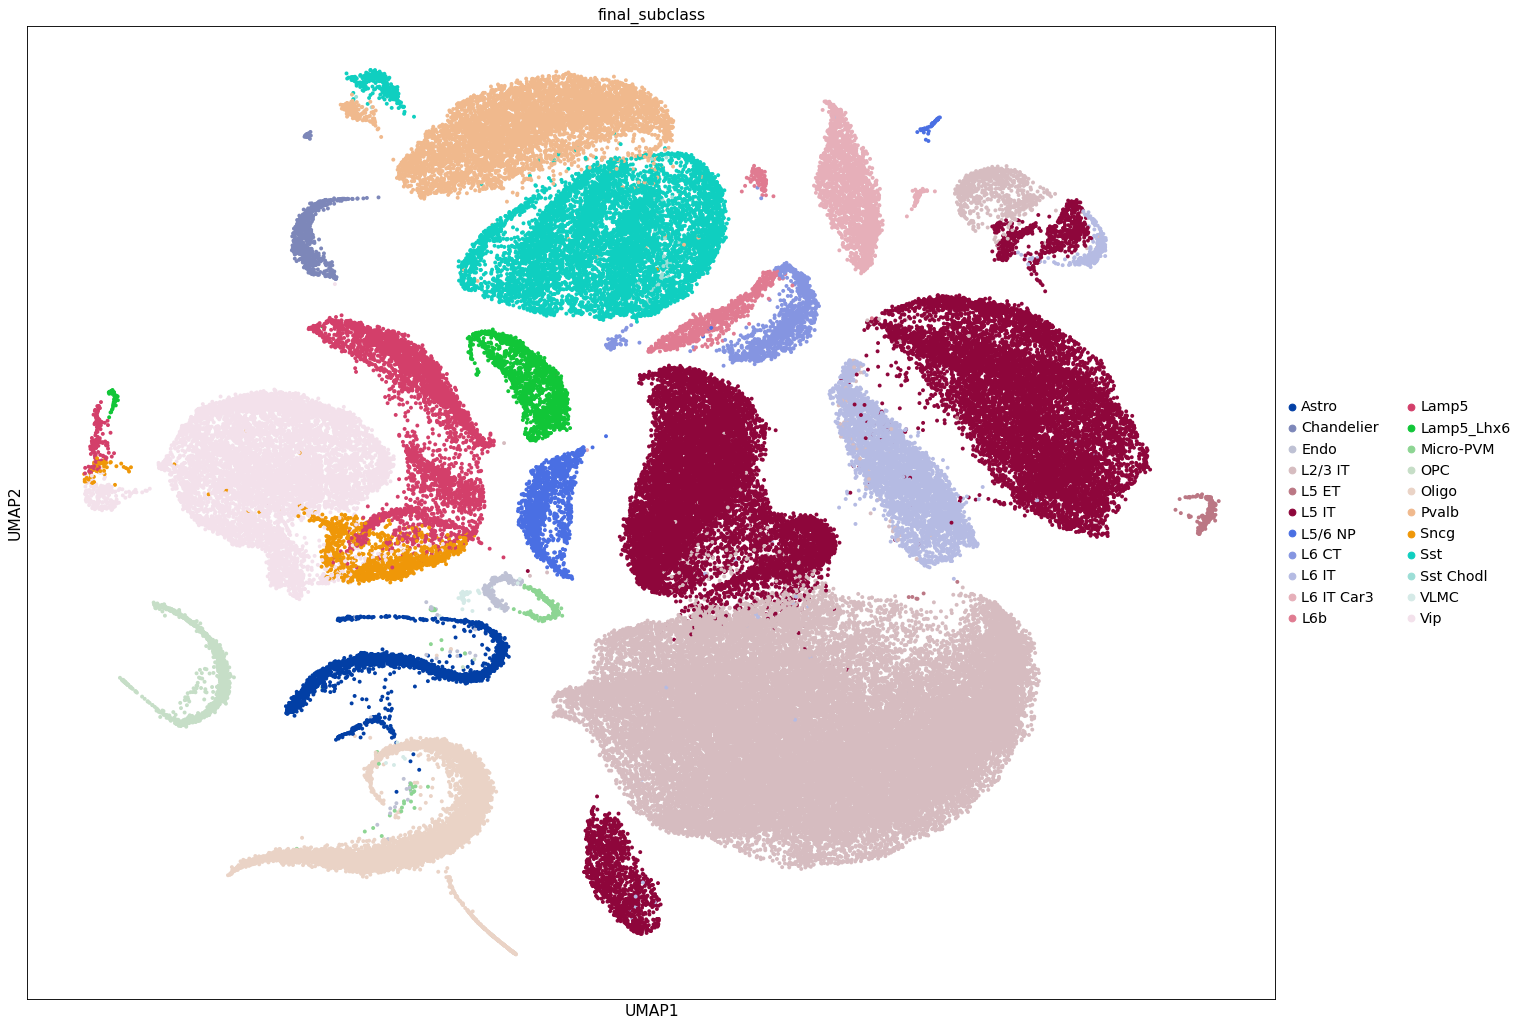

In [84]:
sc.set_figure_params(facecolor = 'white', figsize = (20,16))
sc.pl.umap(chimp_trimmed_to_fc_genes, color=['final_subclass'], s =50)

In [85]:
sc.pp.log1p(human_trimmed_to_shared)
sc.pp.highly_variable_genes(human_trimmed_to_shared, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.tl.pca(human_trimmed_to_shared, svd_solver='arpack')

sc.pp.neighbors(human_trimmed_to_shared, n_neighbors=10, n_pcs=40)
sc.tl.umap(human_trimmed_to_shared)
sc.tl.leiden(human_trimmed_to_shared)

color_list =human_trimmed_to_shared.obs['final_cluster_color'].value_counts().index.to_list()


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'class' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'class2' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in panda

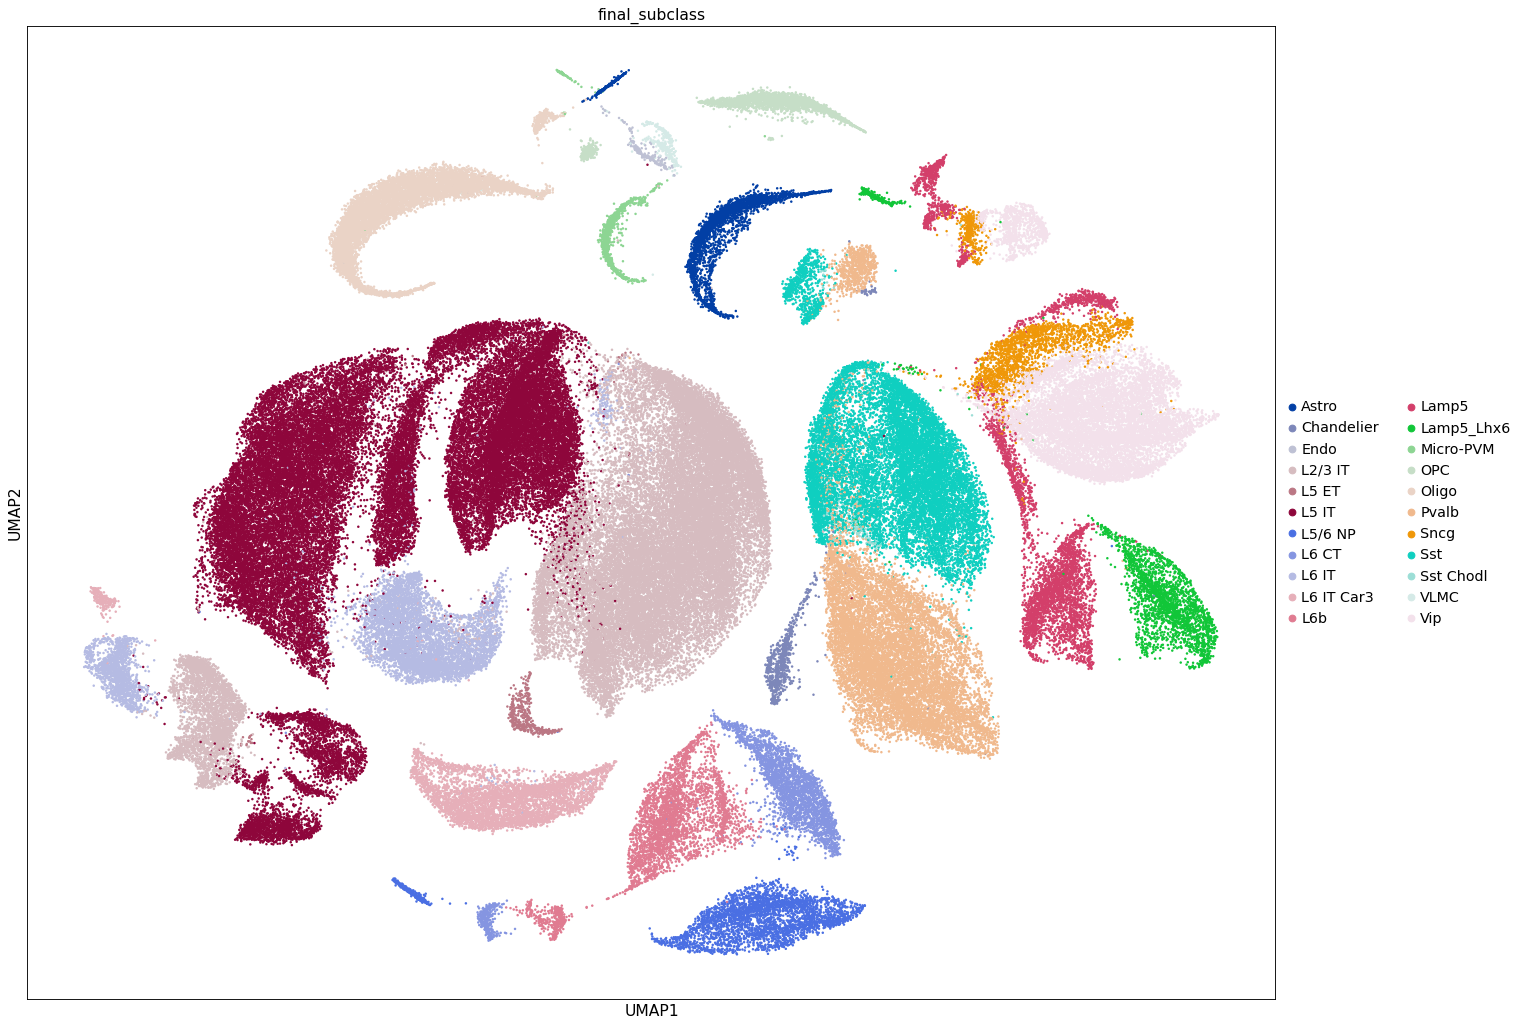

In [86]:
sc.pl.umap(human_trimmed_to_shared, color=['final_subclass'], s =20)


In [87]:
concatenated_human_chimp_data = ad.concat([human_trimmed_to_shared,chimp_trimmed_to_shared], label = 'Species',keys = ['Human','Chimp'])
concatenated_human_chimp_data


AnnData object with n_obs × n_vars = 270166 × 10129
    obs: 'class', 'class2', 'confirmed_cluster', 'confirmed_cluster_color', 'confirmed_subclass', 'confirmed_subclass_color', 'dataset', 'donor', 'doublet_score', 'exclude', 'final_cluster', 'final_cluster_color', 'final_subclass', 'final_subclass_color', 'hicat_clusters', 'integration_donor', 'keeper', 'layer', 'merged_cl', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'neighborhood', 'orig.ident', 'sample_id', 'seurat_clusters', 'sex', 'species', 'species_tech', 'subclass', 'subclass_color', 'tech', 'leiden', 'Species'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [92]:
concatenated_human_chimp_data.obs = concatenated_human_chimp_data.obs[['final_subclass','final_cluster','final_subclass_color','final_cluster_color','Species','tech','leiden']]

In [93]:
#concatenated_human_chimp_data.write('/data/passala/Generated_Tables/chimp_human_data/chimp_human_concatenated_and_slimmed.h5ad')

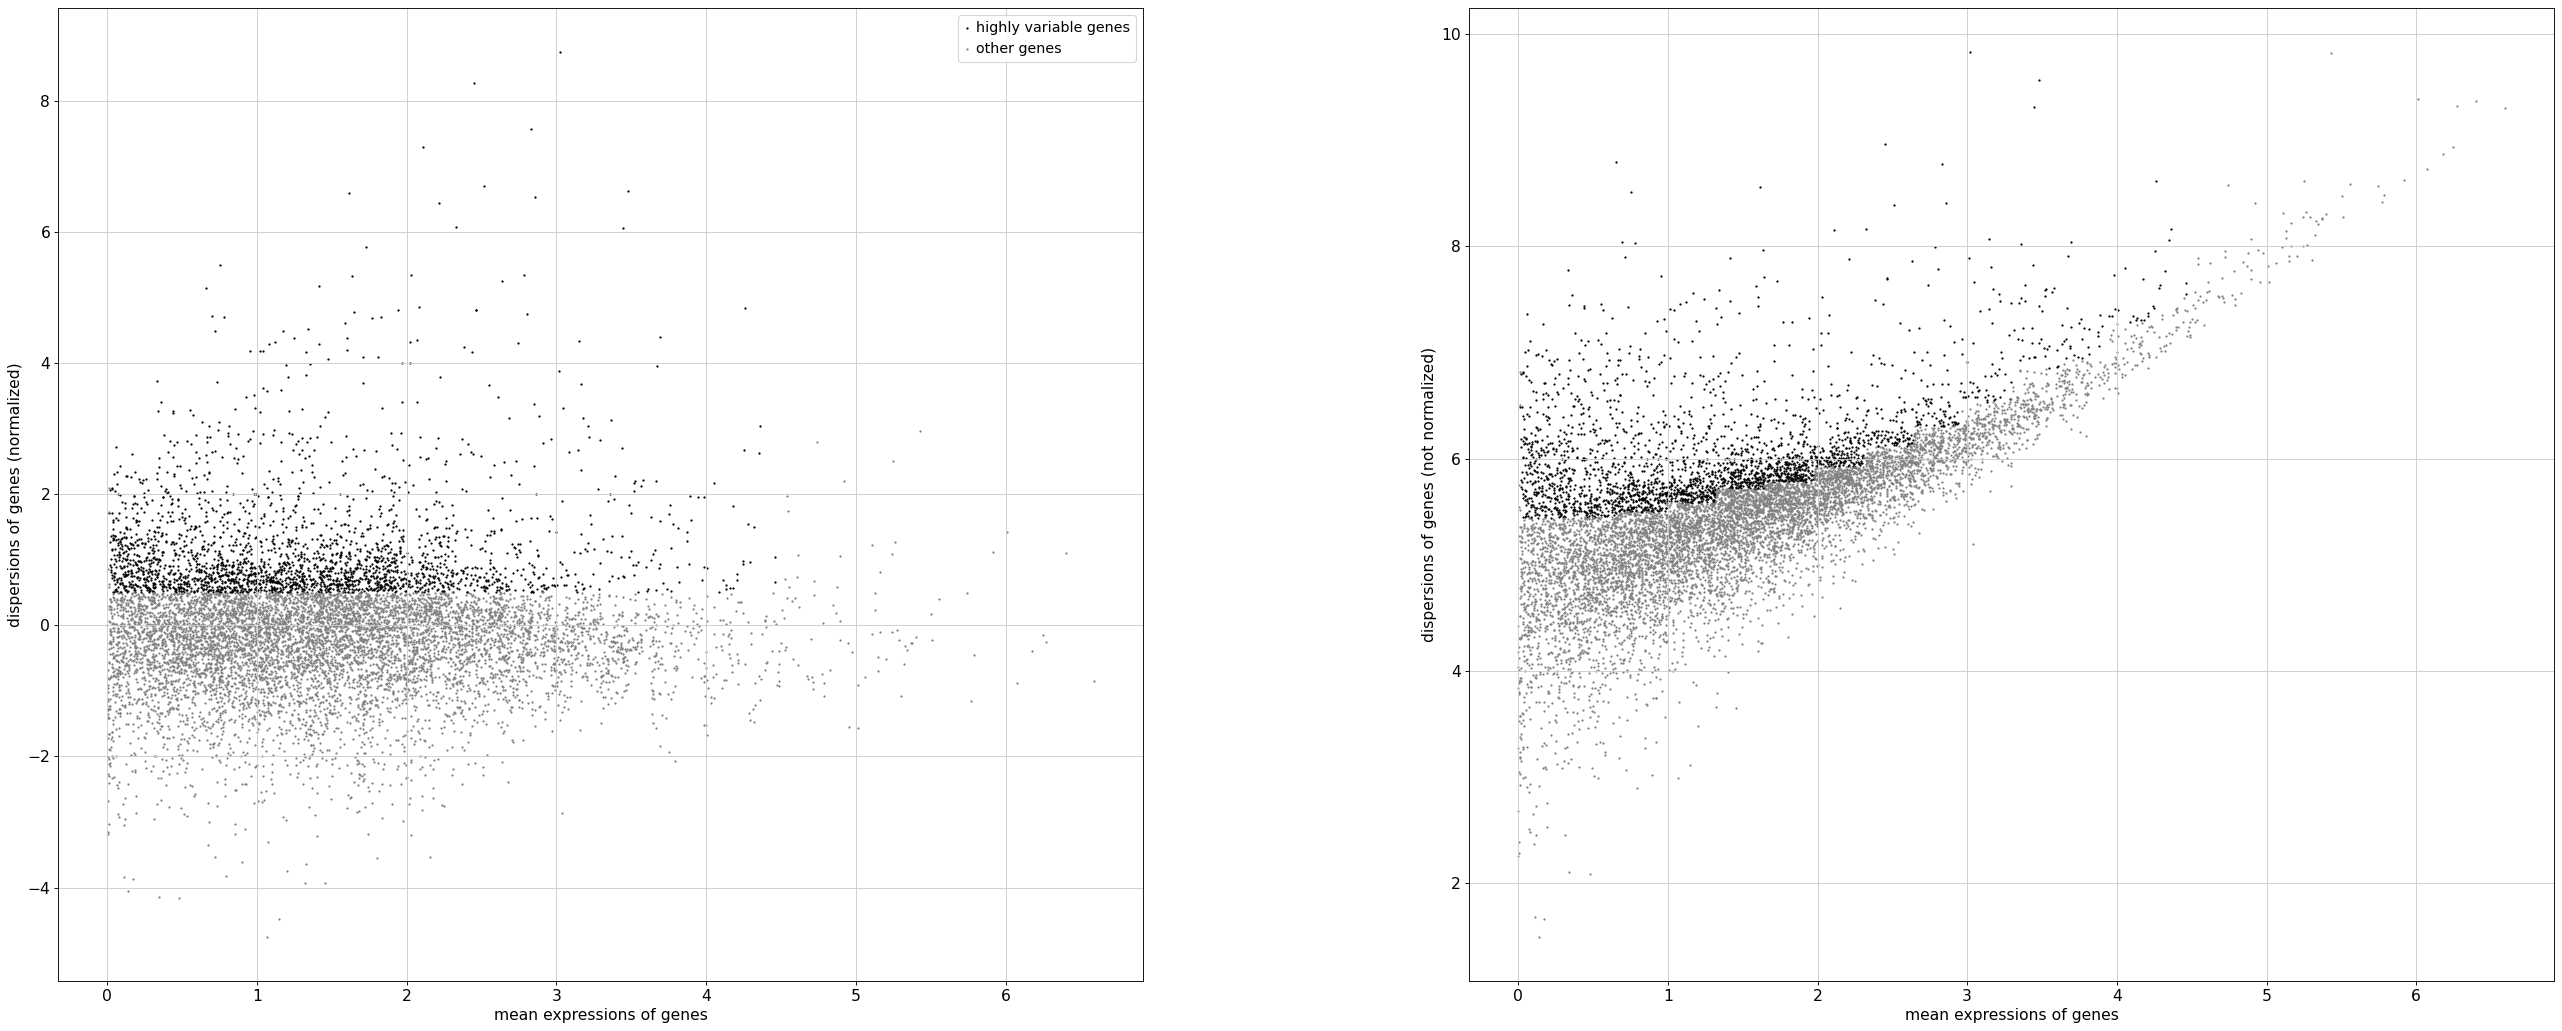

In [ ]:
sc.pp.highly_variable_genes(concatenated_human_chimp_data, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

sc.pl.highly_variable_genes(concatenated_human_chimp_data)


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'class' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'class2' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in panda

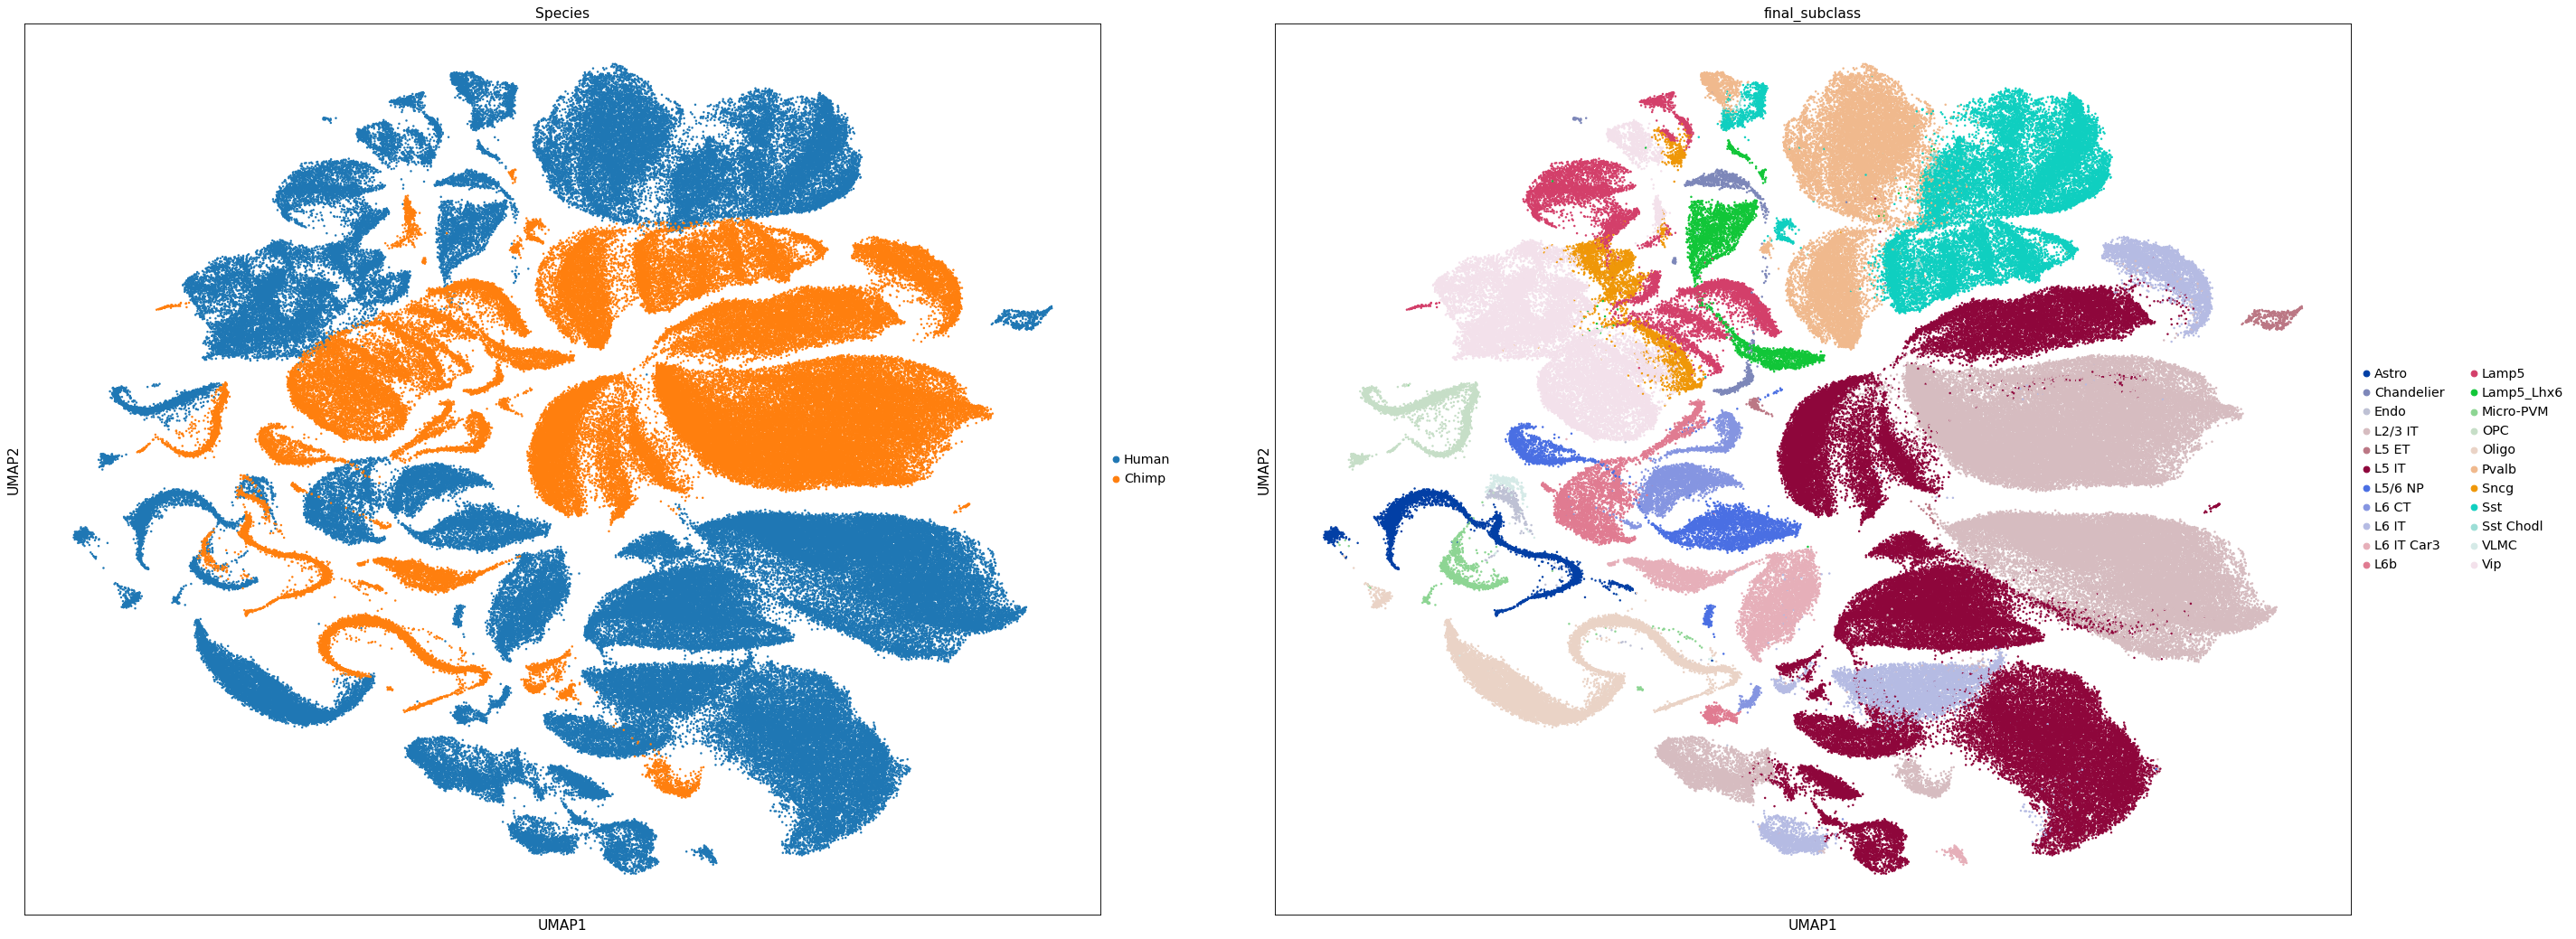

In [ ]:
sc.tl.pca(concatenated_human_chimp_data, svd_solver='arpack',)
sc.pp.neighbors(concatenated_human_chimp_data, n_neighbors=10, n_pcs=50,)
sc.tl.umap(concatenated_human_chimp_data,)
sc.pl.umap(concatenated_human_chimp_data, color= ['Species', 'final_subclass'], s = 20,)

In [ ]:
import scanorama
concatenated_human_chimp_data = ad.concat([human_trimmed_to_shared,chimp_trimmed_to_shared], label = 'Species',keys = ['Human','Chimp'])
sc.external.pp.scanorama_integrate(concatenated_human_chimp_data,'Species', batch_size= 500)
sc.pp.neighbors(concatenated_human_chimp_data, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama',)
sc.tl.umap(concatenated_human_chimp_data, )
sc.pl.umap(concatenated_human_chimp_data, color= ['Species', 'final_subclass'], s = 20,)

MemoryError: Unable to allocate 4.86 GiB for an array with shape (1304563852,) and data type float32